In [1]:
seed=1
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['PYTHONHASHSEED']=str(seed)
import numpy as np
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense ,Input,concatenate ,Conv2D,Conv2DTranspose,\
MaxPooling2D,AveragePooling2D, LSTM ,Reshape, TimeDistributed,ReLU, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import warnings
import glob
import math
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import pickle
from collections import deque
from tqdm import tqdm,trange
import gym
from copy import copy , deepcopy
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

[]

  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.44it/s]

episode : 0 reward : -282.1719179568147
total test reward=-215.92426076405263


  5%|███▉                                                                          | 103/2010 [00:00<00:03, 511.67it/s]

episode : 1 reward : -193.05156704871177
total test reward=-205.4292303736028


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 2 reward : -267.14668350163583
total test reward=-175.04243204293053


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 3 reward : -277.2265098095722
total test reward=-262.4282184855598


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 4 reward : -85.41782409185713
total test reward=-204.1491375667209


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 5 reward : 35.49436291944939
total test reward=-134.01990006924547


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 6 reward : -90.94466274714382
total test reward=-197.4802155992635


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.33it/s]

episode : 7 reward : -74.52172190042504
total test reward=-203.34772624227838


  5%|███▋                                                                           | 93/2010 [00:00<00:04, 462.17it/s]

episode : 8 reward : -42.015801975626005
total test reward=-226.48587996151355


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.59it/s]

episode : 9 reward : -115.55254151483805
total test reward=-175.28202233630196


  5%|███▉                                                                           | 99/2010 [00:00<00:04, 477.01it/s]

episode : 10 reward : 45.3523065599868
total test reward=-191.61815593693387


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.67it/s]

episode : 11 reward : 13.564237556392836
total test reward=-143.00513135951104


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 12 reward : 24.95826557152255
total test reward=-95.23975834469056


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 13 reward : -35.36403459839055
total test reward=-168.92256398876953


  3%|██                                                                             | 54/2010 [00:00<00:03, 493.30it/s]

episode : 14 reward : 42.72584097325663
total test reward=-168.3736498844427


  5%|███▉                                                                           | 99/2010 [00:00<00:03, 482.67it/s]

episode : 15 reward : 93.21376492333664
total test reward=-189.7483490842061


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.82it/s]

episode : 16 reward : 61.746653419343765
total test reward=-130.37265374063318


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.87it/s]

episode : 17 reward : 46.830841404490975
total test reward=-124.00355244769867


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 18 reward : 23.077621618449935
total test reward=-95.95990115364398


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.70it/s]

episode : 19 reward : 96.79914673709276
total test reward=-85.33323848311781


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.32it/s]

episode : 20 reward : 96.96647222194127
total test reward=-134.85578860903126


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.00it/s]

episode : 21 reward : 41.65812465724606
total test reward=-112.62032675138349


  2%|█▌                                                                             | 40/2010 [00:00<00:05, 389.38it/s]

episode : 22 reward : 26.279665693009
total test reward=-150.34406126089533


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.73it/s]

episode : 23 reward : 22.256562628616607
total test reward=-104.9984361942928


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.14it/s]

episode : 24 reward : 97.41614648712452
total test reward=-121.92020511730342


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.67it/s]

episode : 25 reward : 4.700416127839619
total test reward=-120.5627135306307


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 515.45it/s]

episode : 26 reward : 18.20004261280392
total test reward=-97.7894387386036


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 27 reward : 89.69599767479477
total test reward=-158.1817490207411


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 28 reward : 89.01469172407513
total test reward=-93.65465376130416


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 29 reward : 55.20939349365569
total test reward=-81.5409583821067


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 30 reward : 64.82790558607437
total test reward=29.20879973985784


  5%|███▊                                                                           | 98/2010 [00:00<00:03, 501.87it/s]

episode : 31 reward : 42.85282444443357
total test reward=-51.39884592851949


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 32 reward : 135.22698981773868
total test reward=-33.770383026184405


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.33it/s]

episode : 33 reward : 74.24304077177169
total test reward=42.22808717218585


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 34 reward : 142.88239497243177
total test reward=-66.1543173010105


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 35 reward : 52.33766205135265
total test reward=-35.36854557075893


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.31it/s]

episode : 36 reward : 35.76418193659245
total test reward=35.85728604389659


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.16it/s]

episode : 37 reward : 116.73466174983206
total test reward=36.770615453507695


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.18it/s]

episode : 38 reward : 97.69911793167005
total test reward=91.08445251144374


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 416.95it/s]

episode : 39 reward : 95.7464805002334
total test reward=37.15420465964348


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.08it/s]

episode : 40 reward : 67.11172481015555
total test reward=58.15148631803554


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.48it/s]

episode : 41 reward : 116.42699626241523
total test reward=-14.170504426336446


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.18it/s]

episode : 42 reward : 58.41285424710709
total test reward=28.49242112322151


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 43 reward : 91.37293376662255
total test reward=-4.635459262748991


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 447.80it/s]

episode : 44 reward : 107.3040331954656
total test reward=74.3224207352265


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.32it/s]

episode : 45 reward : 84.70807047401196
total test reward=7.66147322358469


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.88it/s]

episode : 46 reward : 112.47545173832314
total test reward=52.9802305826877


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 47 reward : 142.8194916266511
total test reward=93.96974571385506


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 48 reward : 45.67209328635891
total test reward=27.124394760358513


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 457.53it/s]

episode : 49 reward : 78.33743275343299
total test reward=-3.968441715417633


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.37it/s]

episode : 50 reward : 111.80117691860991
total test reward=51.418007207100835


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 51 reward : 62.226226636436984
total test reward=94.4323846844111


  5%|███▋                                                                           | 95/2010 [00:00<00:03, 484.66it/s]

episode : 52 reward : 88.75176509584057
total test reward=56.3506109038327


  5%|███▌                                                                           | 91/2010 [00:00<00:04, 450.54it/s]

episode : 53 reward : 111.26847940565268
total test reward=4.876360207038218


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.53it/s]

episode : 54 reward : 116.93421084411273
total test reward=66.22945455744494


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.38it/s]

episode : 55 reward : 102.12986658776052
total test reward=76.60168250811952


  2%|█▌                                                                             | 40/2010 [00:00<00:04, 397.10it/s]

episode : 56 reward : 101.09495552290788
total test reward=113.34493524960628


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.19it/s]

episode : 57 reward : 67.49782653862567
total test reward=2.0121317741685516


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 58 reward : 97.97240172841464
total test reward=77.36534522374988


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.74it/s]

episode : 59 reward : 99.47739735679164
total test reward=-72.90438256675245


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 438.06it/s]

episode : 60 reward : 111.65051033562449
total test reward=126.63684169810472


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 61 reward : 69.50996236555679
total test reward=75.91089416650894


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.06it/s]

episode : 62 reward : 26.436121004727525
total test reward=145.15666947169092


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 383.38it/s]

episode : 63 reward : 110.07942734244712
total test reward=68.70612342052019


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 467.27it/s]

episode : 64 reward : 84.18117505146945
total test reward=62.96450688641496


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.16it/s]

episode : 65 reward : 118.40332274451981
total test reward=90.35492543175255


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.60it/s]

episode : 66 reward : 127.03482296082605
total test reward=123.4768348070698


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.19it/s]

episode : 67 reward : 148.43039454458824
total test reward=46.828673246740934


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.81it/s]

episode : 68 reward : 105.55545345521577
total test reward=86.37238324092513


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.89it/s]

episode : 69 reward : 187.26278366391222
total test reward=116.74548242570688


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.15it/s]

episode : 70 reward : 87.94327664184154
total test reward=58.99156409966721


  5%|███▊                                                                           | 97/2010 [00:00<00:03, 485.39it/s]

episode : 71 reward : 183.5650987739083
total test reward=9.353740133928733


  5%|███▉                                                                          | 102/2010 [00:00<00:03, 501.34it/s]

episode : 72 reward : 128.62021613361486
total test reward=126.73349955338942


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.00it/s]

episode : 73 reward : 105.70297466160386
total test reward=173.1962134808499


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 74 reward : 96.96531003059772
total test reward=105.89627763059859


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.08it/s]

episode : 75 reward : 129.70034553541797
total test reward=39.291572422394545


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.19it/s]

episode : 76 reward : 111.32994243687408
total test reward=70.62685954465516


  5%|███▉                                                                          | 101/2010 [00:00<00:03, 501.71it/s]

episode : 77 reward : 152.21016151112326
total test reward=168.42224011600683


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.35it/s]

episode : 78 reward : 72.37255594500614
total test reward=184.05421651976468


  3%|██                                                                             | 53/2010 [00:00<00:03, 525.98it/s]

episode : 79 reward : 218.09135227356717
total test reward=136.73732988696415


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.23it/s]

episode : 80 reward : 149.6504262549128
total test reward=151.59421974418214


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.28it/s]

episode : 81 reward : 123.68900231009786
total test reward=214.11435593040977


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.27it/s]

episode : 82 reward : 98.75952581656937
total test reward=136.0376760854671


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.66it/s]

episode : 83 reward : 267.717453654932
total test reward=176.86869670559886


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 84 reward : 223.3227363140677
total test reward=163.76415604869797


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 387.17it/s]

episode : 85 reward : 224.81605606399057
total test reward=139.87384036526663


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.73it/s]

episode : 86 reward : 173.50470551581583
total test reward=142.33919895988714


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.00it/s]

episode : 87 reward : 204.4678792226786
total test reward=147.36768188399097


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.19it/s]

episode : 88 reward : 225.3509942064064
total test reward=113.29236953266889


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 89 reward : 164.677003460182
total test reward=194.3054193989457


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.52it/s]

episode : 90 reward : 139.3742512926085
total test reward=176.84874897554474


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 91 reward : 227.75038294396046
total test reward=164.73090525237106


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.83it/s]

episode : 92 reward : 2.6756463983315424
total test reward=126.06902879881304


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.50it/s]

episode : 93 reward : 249.6100964029517
total test reward=138.6364355378028


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.74it/s]

episode : 94 reward : 257.98714085896836
total test reward=143.2276735339714


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.08it/s]

episode : 95 reward : 275.9951298182582
total test reward=129.07047236690644


  5%|████▎                                                                         | 110/2010 [00:00<00:03, 549.62it/s]

episode : 96 reward : 228.26414552683318
total test reward=111.22013192229353


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 97 reward : 100.48816357575244
total test reward=15.240762354070077


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.31it/s]

episode : 98 reward : 190.8178009121379
total test reward=174.22567385458336


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.65it/s]

episode : 99 reward : 182.4351810246632
total test reward=159.92604537083758


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 377.24it/s]

episode : 100 reward : 104.77492552491088
total test reward=72.29242122901091


  6%|████▍                                                                         | 113/2010 [00:00<00:03, 555.14it/s]

episode : 101 reward : 101.18982182822336
total test reward=10.881000931177681


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.49it/s]

episode : 102 reward : 217.79334409812515
total test reward=134.16139727600734


  5%|████▏                                                                         | 109/2010 [00:00<00:03, 549.30it/s]

episode : 103 reward : 279.97787434471314
total test reward=83.1233902670164


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.79it/s]

episode : 104 reward : 208.03761225772035
total test reward=163.56741452137717


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.72it/s]

episode : 105 reward : 153.62407852772714
total test reward=33.49038450747126


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 106 reward : 132.9333798935054
total test reward=139.20204174131413


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 107 reward : 108.8586262737605
total test reward=151.19354661819435


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 108 reward : 126.79435703132606
total test reward=115.23127822749038


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.54it/s]

episode : 109 reward : 118.98226347720346
total test reward=143.68594218257275


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.58it/s]

episode : 110 reward : 223.18449101589817
total test reward=139.3187678892403


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.79it/s]

episode : 111 reward : 274.510297498594
total test reward=133.6458522701796


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.66it/s]

episode : 112 reward : 230.65630029068964
total test reward=210.4882386673161


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.16it/s]

episode : 113 reward : 288.03731600981484
total test reward=40.81149419243662


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.66it/s]

episode : 114 reward : 267.5106145554169
total test reward=140.19154863378142


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 467.26it/s]

episode : 115 reward : 211.16549238910557
total test reward=147.60900573035354


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 418.59it/s]

episode : 116 reward : 245.1572747383562
total test reward=233.45472669845475


  5%|████▏                                                                         | 109/2010 [00:00<00:03, 550.16it/s]

episode : 117 reward : 252.4950933299687
total test reward=203.54899750505777


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 118 reward : 248.81642647141777
total test reward=133.85781310956415


  3%|██                                                                             | 53/2010 [00:00<00:03, 525.99it/s]

episode : 119 reward : 259.68032404104247
total test reward=213.5138772033998


  2%|█▌                                                                             | 40/2010 [00:00<00:05, 385.64it/s]

episode : 120 reward : -19.999126864692165
total test reward=202.29390029698


  2%|█▍                                                                             | 37/2010 [00:00<00:05, 363.71it/s]

episode : 121 reward : 304.3006873989127
total test reward=150.28504338385588


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.80it/s]

episode : 122 reward : 217.08405960082206
total test reward=166.53891309195228


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.82it/s]

episode : 123 reward : 120.77085994636731
total test reward=190.3584523172839


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.38it/s]

episode : 124 reward : 272.50713577945356
total test reward=159.5685574022454


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.66it/s]

episode : 125 reward : 195.43303010372787
total test reward=141.289213092565


  5%|████                                                                          | 104/2010 [00:00<00:03, 524.98it/s]

episode : 126 reward : 240.9324474591356
total test reward=157.24701375807942


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.95it/s]

episode : 127 reward : 273.9538837606766
total test reward=184.89657742756597


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.99it/s]

episode : 128 reward : 95.3571026918247
total test reward=122.35050873306022


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.82it/s]

episode : 129 reward : 184.8472755878118
total test reward=231.7156420396547


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.15it/s]

episode : 130 reward : 88.88271420885816
total test reward=214.51055902615298


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.36it/s]

episode : 131 reward : 246.63152696063477
total test reward=165.867827929793


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.68it/s]

episode : 132 reward : 300.83295515819657
total test reward=228.08247878950527


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 133 reward : 75.07788510443422
total test reward=205.43310632321254


  5%|████                                                                          | 105/2010 [00:00<00:03, 529.58it/s]

episode : 134 reward : 249.4956764881587
total test reward=198.44317646110858


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 387.21it/s]

episode : 135 reward : 225.85027552589858
total test reward=234.80996939411247


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.83it/s]

episode : 136 reward : 254.24001059627625
total test reward=225.7830959937468


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.79it/s]

episode : 137 reward : 253.2079072130573
total test reward=237.63169575192637


  5%|███▌                                                                           | 92/2010 [00:00<00:04, 457.27it/s]

episode : 138 reward : 251.30305079212292
total test reward=156.8174714121567


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 383.37it/s]

episode : 139 reward : 213.38441861877135
total test reward=271.18131310634317


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 140 reward : 249.91311020539024
total test reward=206.71815759757084


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 141 reward : 218.75899847082118
total test reward=209.6893947351376


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.53it/s]

episode : 142 reward : 264.1673734552529
total test reward=202.18569387345647


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.16it/s]

episode : 143 reward : 244.85079141931445
total test reward=195.31056972027056


  6%|████▎                                                                         | 111/2010 [00:00<00:03, 558.18it/s]

episode : 144 reward : 280.756332162064
total test reward=202.5795071297295


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.79it/s]

episode : 145 reward : 98.59011864416074
total test reward=142.79166293728622


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 467.25it/s]

episode : 146 reward : 126.76457784848594
total test reward=134.04565403063643


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.31it/s]

episode : 147 reward : 205.93877774352933
total test reward=160.57727874440934


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.66it/s]

episode : 148 reward : 244.54523559394343
total test reward=147.08947141487613


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.00it/s]

episode : 149 reward : 215.08271606719052
total test reward=161.2387311323121


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.14it/s]

episode : 150 reward : 239.60468592759327
total test reward=252.47714689881997


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.99it/s]

episode : 151 reward : 178.53723736268284
total test reward=198.5936306257304


  3%|██                                                                             | 52/2010 [00:00<00:03, 506.05it/s]

episode : 152 reward : 72.50284224187803
total test reward=207.53136099199583


  5%|████▏                                                                         | 109/2010 [00:00<00:03, 553.08it/s]

episode : 153 reward : 245.97523976706998
total test reward=202.0496837521471


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.15it/s]

episode : 154 reward : 278.48476644385846
total test reward=90.99963477783335


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.16it/s]

episode : 155 reward : 222.692797667187
total test reward=71.74325787312128


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 476.85it/s]

episode : 156 reward : 108.23346035293646
total test reward=190.84610984996527


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.38it/s]

episode : 157 reward : 128.7020514417763
total test reward=234.23561703188312


  5%|███▋                                                                           | 95/2010 [00:00<00:04, 469.52it/s]

episode : 158 reward : 251.34320533949608
total test reward=227.33788323224712


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 488.88it/s]

episode : 159 reward : 240.1703945770834
total test reward=204.79686765333912


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 428.42it/s]

episode : 160 reward : 280.0376020967508
total test reward=109.57079524366911


  3%|██                                                                             | 51/2010 [00:00<00:03, 497.32it/s]

episode : 161 reward : 264.80787763239334
total test reward=114.99328485455028


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.64it/s]

episode : 162 reward : -37.101253866542095
total test reward=263.2601839721048


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 556.13it/s]

episode : 163 reward : 163.65190872053387
total test reward=206.8688271361146


  5%|████                                                                          | 104/2010 [00:00<00:03, 518.38it/s]

episode : 164 reward : 235.71257884189208
total test reward=264.1363911219563


  3%|██                                                                             | 54/2010 [00:00<00:03, 539.27it/s]

episode : 165 reward : 261.2650083372048
total test reward=253.68506248327216


  5%|███▉                                                                           | 99/2010 [00:00<00:03, 504.75it/s]

episode : 166 reward : 211.58796165156957
total test reward=257.9876388692996


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.83it/s]

episode : 167 reward : 238.8735289556657
total test reward=262.6835776100405


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 369.92it/s]

episode : 168 reward : 245.89622327984355
total test reward=216.8097559549527


  4%|███▍                                                                           | 86/2010 [00:00<00:04, 426.34it/s]

episode : 169 reward : 268.16569076008165
total test reward=258.6180445778592


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.33it/s]

episode : 170 reward : 270.6049575276985
total test reward=179.90795408239896


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.49it/s]

episode : 171 reward : 210.95109859826584
total test reward=258.98963749780796


  5%|███▉                                                                           | 99/2010 [00:00<00:03, 501.59it/s]

episode : 172 reward : 241.38196297542913
total test reward=250.2746560197681


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.53it/s]

episode : 173 reward : -52.70609086113651
total test reward=220.48449416880595


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 174 reward : 245.6513413413813
total test reward=212.1029994208303


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 175 reward : 153.56829318615578
total test reward=213.96586798795073


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 493.88it/s]

episode : 176 reward : 177.0516838175947
total test reward=267.6554979796566


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.58it/s]

episode : 177 reward : 275.19560581211556
total test reward=270.39244868145454


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 468.16it/s]

episode : 178 reward : 211.60172032826068
total test reward=267.46136932517066


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.35it/s]

episode : 179 reward : 114.94543838980101
total test reward=258.5733303376413


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 498.63it/s]

episode : 180 reward : -109.13378327616535
total test reward=147.52418555662967


  3%|██                                                                             | 53/2010 [00:00<00:03, 525.83it/s]

episode : 181 reward : 268.76128638019446
total test reward=206.95452254150024


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 182 reward : 147.13587165065732
total test reward=247.19049221967913


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 434.72it/s]

episode : 183 reward : 269.3773853901312
total test reward=227.67748322242784


  5%|███▊                                                                           | 97/2010 [00:00<00:03, 488.66it/s]

episode : 184 reward : 234.55224577015485
total test reward=237.3283214477514


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 499.73it/s]

episode : 185 reward : 300.803888691063
total test reward=267.65508870503123


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.14it/s]

episode : 186 reward : 115.46988005264402
total test reward=260.161975803978


  3%|██                                                                             | 53/2010 [00:00<00:03, 523.86it/s]

episode : 187 reward : 295.01355378951325
total test reward=278.5932453020879


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 484.68it/s]

episode : 188 reward : 296.4245476143617
total test reward=262.509196037613


  2%|█▎                                                                             | 34/2010 [00:00<00:05, 334.23it/s]

episode : 189 reward : 256.5225628419546
total test reward=243.79819475703803


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 190 reward : 204.2216821723394
total test reward=231.48964013210804


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 495.70it/s]

episode : 191 reward : 235.89837876203012
total test reward=262.3485678256217


  3%|██                                                                             | 52/2010 [00:00<00:03, 518.71it/s]

episode : 192 reward : 289.313901507034
total test reward=267.1321865147882


  3%|██                                                                             | 51/2010 [00:00<00:03, 503.13it/s]

episode : 193 reward : 291.2502916819405
total test reward=249.53073544153918


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 424.77it/s]

episode : 194 reward : 126.23825330349786
total test reward=206.46578775427514


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.24it/s]

episode : 195 reward : 251.80755793295404
total test reward=269.0117102277789


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.31it/s]

episode : 196 reward : 156.2186439274192
total test reward=270.0721361806757


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 467.01it/s]

episode : 197 reward : 259.17583451822355
total test reward=273.58867824413954


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 469.68it/s]

episode : 198 reward : 253.26003244355067
total test reward=265.1347792360291


  3%|██                                                                             | 53/2010 [00:00<00:03, 524.74it/s]

episode : 199 reward : 271.23933183743975
total test reward=274.32173259164585


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.54it/s]

episode : 200 reward : 304.0573526074279
total test reward=254.26706677006206


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.66it/s]

episode : 201 reward : 307.94488596093424
total test reward=273.6864145587101


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 202 reward : 257.4726763255734
total test reward=262.9343312609008


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 495.77it/s]

episode : 203 reward : 247.32052629862676
total test reward=253.2452777161253


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 456.50it/s]

episode : 204 reward : -35.27241407135904
total test reward=273.3624105878383


  5%|███▉                                                                           | 99/2010 [00:00<00:03, 491.88it/s]

episode : 205 reward : 241.3979189048332
total test reward=234.47026804596834


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 473.04it/s]

episode : 206 reward : 270.55574827805407
total test reward=267.94871926603844


  4%|███▍                                                                           | 86/2010 [00:00<00:04, 428.67it/s]

episode : 207 reward : 255.01943094525927
total test reward=274.3324192056615


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 424.97it/s]

episode : 208 reward : 120.90622781234939
total test reward=242.40740225312464


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.62it/s]

episode : 209 reward : 306.037429953842
total test reward=240.02636113162052


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 492.60it/s]

episode : 210 reward : 284.35615713230675
total test reward=268.8723125117329


  5%|███▊                                                                           | 96/2010 [00:00<00:03, 485.58it/s]

episode : 211 reward : 213.88650836472465
total test reward=260.496106478388


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.21it/s]

episode : 212 reward : 272.5194107314461
total test reward=281.4829823862355


100%|█████████████████████████████████████████████████████████████████████████████| 2010/2010 [00:05<00:00, 394.82it/s]
C:\Users\irfan\.conda\envs\tf\lib\site-packages\gym\envs\box2d\lunar_lander.py:250: RuntimeWarning: invalid value encountered in greater
  if (self.continuous and action[0] > 0.0) or (not self.continuous and action==2):
C:\Users\irfan\.conda\envs\tf\lib\site-packages\gym\envs\box2d\lunar_lander.py:265: RuntimeWarning: invalid value encountered in greater
  if (self.continuous and np.abs(action[1]) > 0.5) or (not self.continuous and action in [1,3]):
  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.66it/s]

episode : 213 reward : -134.06459793031135
total test reward=-23.801002918408596


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.31it/s]

episode : 214 reward : -15.795702623251827
total test reward=-52.10318044980338


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.84it/s]

episode : 215 reward : -20.22172225548519
total test reward=-35.70162870308379


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.68it/s]

episode : 216 reward : 2.443271745536407
total test reward=-10.235142197642938


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 217 reward : -70.36273510605116
total test reward=-40.207834235284224


  3%|██                                                                             | 53/2010 [00:00<00:03, 519.76it/s]

episode : 218 reward : -19.51032218683997
total test reward=-35.00059746367649


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.69it/s]

episode : 219 reward : -67.8005239584615
total test reward=-29.368460797609792


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.08it/s]

episode : 220 reward : -12.776485086496507
total test reward=-34.60335662448572


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 221 reward : -14.37062807598565
total test reward=-35.44169744154347


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 222 reward : -76.92524559462876
total test reward=-46.0618213864888


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.70it/s]

episode : 223 reward : -60.42767384702677
total test reward=-10.580881804025305


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.60it/s]

episode : 224 reward : -42.225630233543285
total test reward=-37.692307287595284


  5%|████▏                                                                         | 108/2010 [00:00<00:03, 530.59it/s]

episode : 225 reward : -45.3165701382803
total test reward=-20.299538568274887


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 226 reward : -40.91842581386726
total test reward=-39.70107130729718


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 227 reward : -2.4581531150614353
total test reward=-25.282386566250857


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 228 reward : -26.188661704080857
total test reward=-39.908751090395775


  3%|██                                                                             | 53/2010 [00:00<00:03, 519.40it/s]

episode : 229 reward : 1.5215143223975645
total test reward=-9.547034391102518


  6%|████▎                                                                         | 111/2010 [00:00<00:03, 558.12it/s]

episode : 230 reward : 13.487576840435509
total test reward=-48.67713240779556


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.48it/s]

episode : 231 reward : -61.502286968575135
total test reward=-84.63761815330143


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.89it/s]

episode : 232 reward : -55.539389152246656
total test reward=-51.03755706609603


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 233 reward : -56.89171111038394
total test reward=-24.47507543614476


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 468.96it/s]

episode : 234 reward : -22.586298510878322
total test reward=-43.36734160328867


  3%|██                                                                             | 52/2010 [00:00<00:03, 510.87it/s]

episode : 235 reward : -20.54830084031579
total test reward=-26.81095129785612


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.20it/s]

episode : 236 reward : -21.451208792169552
total test reward=-54.29825130387767


  3%|██                                                                             | 51/2010 [00:00<00:03, 505.59it/s]

episode : 237 reward : -64.08635458843679
total test reward=-47.9281180792163


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 238 reward : -29.86671411942399
total test reward=-19.195862327591858


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 239 reward : 9.802036495309068
total test reward=4.2937394327324565


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 545.57it/s]

episode : 240 reward : -33.08593248168074
total test reward=-41.86817519346714


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 544.66it/s]

episode : 241 reward : -49.46825724017074
total test reward=-54.406961379791554


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 559.93it/s]

episode : 242 reward : -35.97217718405133
total test reward=-28.5952612246221


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.37it/s]

episode : 243 reward : -25.933035506101902
total test reward=-31.19743612241907


  5%|███▊                                                                           | 98/2010 [00:00<00:03, 490.19it/s]

episode : 244 reward : -46.100849376861675
total test reward=-39.0968173080535


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.54it/s]

episode : 245 reward : -58.1043261924068
total test reward=-18.30355076549278


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 246 reward : -20.466229745637293
total test reward=-29.60130798449877


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.23it/s]

episode : 247 reward : -21.312445399752534
total test reward=-26.784788087677498


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 551.03it/s]

episode : 248 reward : -22.590329303369373
total test reward=-36.42626753343609


  5%|████▎                                                                         | 110/2010 [00:00<00:03, 547.28it/s]

episode : 249 reward : -20.398594028883622
total test reward=-45.8702493047202


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.00it/s]

episode : 250 reward : -30.58598108424144
total test reward=-30.8282508222059


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 556.30it/s]

episode : 251 reward : -69.24680187618478
total test reward=-29.68094877201035


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.34it/s]

episode : 252 reward : -35.44515423953342
total test reward=-19.217128618285425


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.28it/s]

episode : 253 reward : -37.847699228841975
total test reward=-49.192365662294


  5%|████                                                                          | 106/2010 [00:00<00:03, 539.39it/s]

episode : 254 reward : -19.394577269424957
total test reward=-27.339510912840996


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.86it/s]

episode : 255 reward : -49.204657340646435
total test reward=-66.0810456125774


  3%|██                                                                             | 52/2010 [00:00<00:03, 515.90it/s]

episode : 256 reward : -30.006546773573177
total test reward=-45.64770066756486


  3%|██                                                                             | 54/2010 [00:00<00:03, 534.02it/s]

episode : 257 reward : -54.39944661870055
total test reward=-42.35894298256256


  3%|██                                                                             | 53/2010 [00:00<00:03, 519.83it/s]

episode : 258 reward : -18.335283634128785
total test reward=-18.320428131015483


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.71it/s]

episode : 259 reward : -106.50938442744558
total test reward=-44.84468501458307


  3%|██                                                                             | 52/2010 [00:00<00:03, 514.53it/s]

episode : 260 reward : -30.72656369047479
total test reward=-48.98574561861159


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 553.29it/s]

episode : 261 reward : 4.9538322030231825
total test reward=-21.94301083572223


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 262 reward : -81.40089974353424
total test reward=-30.357539310995854


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.33it/s]

episode : 263 reward : -24.78871206430415
total test reward=-15.739814277721115


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 551.42it/s]

episode : 264 reward : 1.3921160381690925
total test reward=-8.896871056007939


  3%|██                                                                             | 53/2010 [00:00<00:03, 525.44it/s]

episode : 265 reward : -86.54893568972341
total test reward=-56.1233972371361


  3%|██                                                                             | 53/2010 [00:00<00:03, 529.76it/s]

episode : 266 reward : -12.793564388507463
total test reward=-33.20456305698636


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.01it/s]

episode : 267 reward : -12.028443660443543
total test reward=-30.042814757040958


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.74it/s]

episode : 268 reward : -12.236936546618779
total test reward=-47.70088521642922


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.50it/s]

episode : 269 reward : -41.158758111639116
total test reward=-43.829556762192006


  5%|████                                                                          | 104/2010 [00:00<00:03, 524.51it/s]

episode : 270 reward : -23.283495525609652
total test reward=-34.336613990562554


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 570.01it/s]

episode : 271 reward : -19.252609181619107
total test reward=-23.7726555177132


  6%|████▎                                                                         | 111/2010 [00:00<00:03, 558.87it/s]

episode : 272 reward : -42.645211937125566
total test reward=-44.96805373019027


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.01it/s]

episode : 273 reward : -19.810956720689063
total test reward=-53.41879761749533


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.64it/s]

episode : 274 reward : -77.17049070872781
total test reward=-46.36266467651223


  3%|██                                                                             | 51/2010 [00:00<00:03, 509.42it/s]

episode : 275 reward : -11.606739094290333
total test reward=-44.336488600766785


  2%|█▎                                                                             | 34/2010 [00:00<00:05, 337.53it/s]

episode : 276 reward : 5.01332104502012
total test reward=-27.650726316772374


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.79it/s]

episode : 277 reward : 65.8777774591565
total test reward=-39.125217013256474


  6%|████▋                                                                         | 120/2010 [00:00<00:03, 599.34it/s]

episode : 278 reward : -30.51387893834942
total test reward=-20.955114630408


  6%|████▍                                                                         | 114/2010 [00:00<00:03, 569.76it/s]

episode : 279 reward : -25.118319886865947
total test reward=-36.731983631735105


  6%|████▍                                                                         | 113/2010 [00:00<00:03, 564.66it/s]

episode : 280 reward : -49.15811702073685
total test reward=-39.67673470972306


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.58it/s]

episode : 281 reward : -53.25574368211477
total test reward=-54.53463472600678


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.84it/s]

episode : 282 reward : -12.237158428986646
total test reward=-14.516596581574357


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 615.30it/s]

episode : 283 reward : -28.116020395592216
total test reward=-83.58678864094665


  5%|███▋                                                                           | 95/2010 [00:00<00:03, 483.27it/s]

episode : 284 reward : -16.10934955608795
total test reward=-39.70310516165817


  2%|█▍                                                                             | 36/2010 [00:00<00:05, 356.92it/s]

episode : 285 reward : -48.05142804033247
total test reward=-20.8607340688314


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 482.73it/s]

episode : 286 reward : -46.12001644678378
total test reward=-44.21010007767368


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 552.39it/s]

episode : 287 reward : -13.515961213570733
total test reward=-54.70931252388957


  6%|████▎                                                                         | 112/2010 [00:00<00:03, 564.66it/s]

episode : 288 reward : -54.50257341304507
total test reward=-41.73429562045477


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.72it/s]

episode : 289 reward : -57.63576400810683
total test reward=-77.45134527855002


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 290 reward : -50.194048416900046
total test reward=-47.145038772226066


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 487.33it/s]

episode : 291 reward : -71.25681430373635
total test reward=-44.97231392357104


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 588.41it/s]

episode : 292 reward : -35.18514000085483
total test reward=-33.11127415833575


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.84it/s]

episode : 293 reward : 66.59446195975283
total test reward=-41.32052663729359


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 574.44it/s]

episode : 294 reward : -62.134839808930224
total test reward=-47.97491319519614


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.26it/s]

episode : 295 reward : -23.556802774045735
total test reward=-40.270116292336475


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.48it/s]

episode : 296 reward : -261.63094488477884
total test reward=-4.935359553840522


  5%|████▎                                                                         | 110/2010 [00:00<00:03, 548.16it/s]

episode : 297 reward : -49.108100200519004
total test reward=-34.32907480930837


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.00it/s]

episode : 298 reward : 39.68747204460274
total test reward=-86.02077738043471


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.99it/s]

episode : 299 reward : -6.204141266202129
total test reward=-37.907055552480315


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.15it/s]

episode : 300 reward : -29.712712041254775
total test reward=-49.285335486738894


  5%|████▏                                                                         | 107/2010 [00:00<00:03, 525.62it/s]

episode : 301 reward : -53.36736632043372
total test reward=-8.79096981466254


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.87it/s]

episode : 302 reward : -59.717321723578266
total test reward=-37.069540864922544


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.07it/s]

episode : 303 reward : -20.731594943161696
total test reward=-39.801111303523804


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.66it/s]

episode : 304 reward : -76.38343776154065
total test reward=-29.384053842012882


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 478.47it/s]

episode : 305 reward : -32.66145977200128
total test reward=-13.379775734485673


  1%|▊                                                                              | 21/2010 [00:00<00:09, 202.46it/s]

episode : 306 reward : -95.16322329528919
total test reward=-27.42369631743158


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 368.09it/s]

episode : 307 reward : -30.186430026729397
total test reward=-37.199245429356


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.05it/s]

episode : 308 reward : -8.046533816295636
total test reward=-3.5802962987802713


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 468.91it/s]

episode : 309 reward : -44.79745903050252
total test reward=-1.6979516921733535


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 494.01it/s]

episode : 310 reward : -9.838216511841864
total test reward=-31.77319490083911


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 458.83it/s]

episode : 311 reward : -115.80815165381637
total test reward=-38.86710915198461


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 483.99it/s]

episode : 312 reward : -29.981867366452462
total test reward=-32.65658514106005


  1%|█▏                                                                             | 30/2010 [00:00<00:06, 293.40it/s]

episode : 313 reward : -36.494506576768
total test reward=-32.755199261502696


  2%|█▎                                                                             | 32/2010 [00:00<00:06, 305.58it/s]

episode : 314 reward : -4.595768746758097
total test reward=-9.599572426586217


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 315 reward : -42.1761266504831
total test reward=-47.17848099095941


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 373.37it/s]

episode : 316 reward : -27.458062047295755
total test reward=-41.52553430901236


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.64it/s]

episode : 317 reward : -97.63698576641625
total test reward=-18.69314761007116


  3%|██                                                                             | 54/2010 [00:00<00:03, 533.23it/s]

episode : 318 reward : -18.71609571006826
total test reward=-0.9297992564749336


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 319 reward : -7.250652928093302
total test reward=-55.96378927562919


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.66it/s]

episode : 320 reward : 7.091488726854436
total test reward=-20.168395982585352


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 495.71it/s]

episode : 321 reward : -7.745257945927989
total test reward=-8.194894473300035


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 472.05it/s]

episode : 322 reward : -35.11470024183899
total test reward=-17.567906712651677


  3%|██                                                                             | 52/2010 [00:00<00:03, 513.13it/s]

episode : 323 reward : -17.361850712496476
total test reward=-29.270717528915647


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 464.32it/s]

episode : 324 reward : -4.305943822571209
total test reward=-23.442785761618893


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 430.17it/s]

episode : 325 reward : -60.05457248726651
total test reward=-10.37125120187324


  3%|██                                                                             | 54/2010 [00:00<00:03, 538.54it/s]

episode : 326 reward : -38.93131185872079
total test reward=-38.70041293707207


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 477.89it/s]

episode : 327 reward : -82.26186607660065
total test reward=-35.915816205969904


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 542.41it/s]

episode : 328 reward : -31.330611611439622
total test reward=-69.30588737757238


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 469.71it/s]

episode : 329 reward : -22.964244809288402
total test reward=-30.805670658451458


  5%|████▏                                                                         | 107/2010 [00:00<00:03, 519.56it/s]

episode : 330 reward : -7.83654223135261
total test reward=-40.37472437710032


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 489.75it/s]

episode : 331 reward : -58.81213535398055
total test reward=2.312252997503208


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 456.89it/s]

episode : 332 reward : -45.07470429136873
total test reward=-55.17763597584356


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 493.23it/s]

episode : 333 reward : -25.856782260387803
total test reward=-33.163392377343044


  3%|██                                                                             | 54/2010 [00:00<00:03, 538.92it/s]

episode : 334 reward : 11.009123826273651
total test reward=-43.79401753177157


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.26it/s]

episode : 335 reward : -25.233749304025224
total test reward=-44.437131694667656


  3%|██                                                                             | 51/2010 [00:00<00:03, 498.90it/s]

episode : 336 reward : 16.8125849625182
total test reward=-25.112710421737614


  3%|██                                                                             | 51/2010 [00:00<00:03, 505.96it/s]

episode : 337 reward : -50.37548413040304
total test reward=-32.11479442475421


  3%|██                                                                             | 51/2010 [00:00<00:03, 500.10it/s]

episode : 338 reward : 119.16193427517172
total test reward=-35.526857050958


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 545.83it/s]

episode : 339 reward : -19.635716295916865
total test reward=-33.3279107218908


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 340 reward : -52.96061774401113
total test reward=-32.70711698740981


  5%|████▏                                                                         | 108/2010 [00:00<00:03, 534.07it/s]

episode : 341 reward : -19.333229692374488
total test reward=-57.17016246950303


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 468.40it/s]

episode : 342 reward : -4.558044595831916
total test reward=-41.60558460154747


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 547.61it/s]

episode : 343 reward : -66.673414682555
total test reward=-41.88099639648856


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 545.65it/s]

episode : 344 reward : -3.916377201712635
total test reward=-29.97996840993513


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 498.61it/s]

episode : 345 reward : -36.59461049295342
total test reward=-46.2881495202687


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 493.90it/s]

episode : 346 reward : -9.738926898042536
total test reward=-57.875031995659256


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 579.58it/s]

episode : 347 reward : -79.58202989980137
total test reward=-28.690471361669285


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 564.88it/s]

episode : 348 reward : -18.206053983506536
total test reward=-7.352024040835625


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.09it/s]

episode : 349 reward : -30.169762424070655
total test reward=-34.52427957910282


  3%|██                                                                             | 51/2010 [00:00<00:03, 496.73it/s]

episode : 350 reward : -55.93304166010526
total test reward=-27.30720772690529


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 562.97it/s]

episode : 351 reward : -12.905041182323174
total test reward=-15.892491191807958


  3%|██                                                                             | 52/2010 [00:00<00:03, 510.67it/s]

episode : 352 reward : -50.60389175494922
total test reward=-66.60869005053641


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.94it/s]

episode : 353 reward : -23.681191181989988
total test reward=-42.68712508448785


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 545.84it/s]

episode : 354 reward : -40.47631073230298
total test reward=-28.647595973608844


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.50it/s]

episode : 355 reward : -38.88039853545018
total test reward=-45.617305144177934


  3%|██                                                                             | 53/2010 [00:00<00:03, 523.54it/s]

episode : 356 reward : -41.76357629515215
total test reward=-41.79095121463977


  3%|██                                                                             | 54/2010 [00:00<00:03, 538.29it/s]

episode : 357 reward : -27.66503245875745
total test reward=-51.55246226411716


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 548.44it/s]

episode : 358 reward : -38.301525655220615
total test reward=19.627726179677165


  3%|██                                                                             | 53/2010 [00:00<00:03, 518.84it/s]

episode : 359 reward : 59.34123079574803
total test reward=-3.2055336668249255


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.49it/s]

episode : 360 reward : -11.215806107204145
total test reward=-43.4178620762475


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.21it/s]

episode : 361 reward : -61.34889641457934
total test reward=-9.259423396356905


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.17it/s]

episode : 362 reward : -38.454784836368276
total test reward=-33.01350801635263


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 558.48it/s]

episode : 363 reward : 128.12470332374144
total test reward=-32.68117452141759


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.27it/s]

episode : 364 reward : 10.076152668896697
total test reward=1.2949360911838426


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.39it/s]

episode : 365 reward : -97.84468188402076
total test reward=-55.157601438517986


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 549.97it/s]

episode : 366 reward : -50.73880403457204
total test reward=-40.18260265543483


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 548.36it/s]

episode : 367 reward : -77.50174585911725
total test reward=-54.96711000226854


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.05it/s]

episode : 368 reward : -51.7338798095729
total test reward=-98.0557679485463


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.21it/s]

episode : 369 reward : -64.57190179527876
total test reward=-71.89496045390591


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 558.85it/s]

episode : 370 reward : 13.291047857964486
total test reward=-30.649096106397998


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 371 reward : -20.27808644668454
total test reward=-42.85148561576294


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 487.39it/s]

episode : 372 reward : -24.681309626362577
total test reward=-52.109642491256366


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 547.53it/s]

episode : 373 reward : -63.320840187299495
total test reward=-39.99658112722786


  3%|██                                                                             | 52/2010 [00:00<00:03, 518.40it/s]

episode : 374 reward : -54.77213115031293
total test reward=-31.364540373173032


  5%|████                                                                          | 104/2010 [00:00<00:03, 517.96it/s]

episode : 375 reward : -23.111414558734083
total test reward=-0.0829364371066447


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 609.56it/s]

episode : 376 reward : -14.046459845542302
total test reward=-5.186409072983008


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 566.41it/s]

episode : 377 reward : -22.358094717366555
total test reward=-27.05077724129248


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.09it/s]

episode : 378 reward : -71.56487206993384
total test reward=-57.746986366873934


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 495.91it/s]

episode : 379 reward : -37.074915475271666
total test reward=-40.30149051970919


  5%|████                                                                          | 104/2010 [00:00<00:03, 527.01it/s]

episode : 380 reward : -56.599888598164
total test reward=-42.1294999825418


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 583.96it/s]

episode : 381 reward : -86.2212029843597
total test reward=-10.30721083312169


  5%|███▉                                                                          | 102/2010 [00:00<00:04, 458.19it/s]

episode : 382 reward : -5.631061272301736
total test reward=-46.32494477308762


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.69it/s]

episode : 383 reward : -85.20658637032847
total test reward=-35.074319786642754


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 384 reward : 27.382315889309524
total test reward=-16.32425024602923


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 609.47it/s]

episode : 385 reward : -93.4160216463676
total test reward=-34.197929465173125


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.87it/s]

episode : 386 reward : -13.439321846124471
total test reward=-23.375950581450002


  3%|██                                                                             | 54/2010 [00:00<00:03, 531.59it/s]

episode : 387 reward : -77.02169317614548
total test reward=7.597899159622353


  3%|██                                                                             | 53/2010 [00:00<00:03, 515.90it/s]

episode : 388 reward : -27.644119982444067
total test reward=-28.19604725632209


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.47it/s]

episode : 389 reward : -30.048222543528823
total test reward=-41.12961592374189


  3%|██                                                                             | 51/2010 [00:00<00:03, 503.69it/s]

episode : 390 reward : -57.764055259892615
total test reward=-19.417438098746004


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.81it/s]

episode : 391 reward : -54.98648618509972
total test reward=-40.56635357458285


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.51it/s]

episode : 392 reward : -68.06101225586053
total test reward=-60.151408539983755


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.04it/s]

episode : 393 reward : -16.903025576031354
total test reward=-25.56568797731068


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 559.90it/s]

episode : 394 reward : -26.222021904748573
total test reward=-47.0676650242808


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 576.11it/s]

episode : 395 reward : -14.235482299157013
total test reward=-31.87057153834428


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.94it/s]

episode : 396 reward : -8.99856012795837
total test reward=-19.14654045561405


  2%|█▌                                                                             | 40/2010 [00:00<00:04, 397.09it/s]

episode : 397 reward : -49.754229541910604
total test reward=-20.951604572021104


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.51it/s]

episode : 398 reward : 6.612415329107108
total test reward=-76.0297311378434


  3%|██                                                                             | 53/2010 [00:00<00:03, 528.73it/s]

episode : 399 reward : -159.68408987348826
total test reward=-27.330748256280373


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 553.50it/s]

episode : 400 reward : -55.435238318723805
total test reward=-20.722260430650458


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 453.14it/s]

episode : 401 reward : -36.19378535044922
total test reward=-17.376711400754477


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 554.88it/s]

episode : 402 reward : -18.273584359431425
total test reward=-31.432028458805057


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.67it/s]

episode : 403 reward : 130.10269176910234
total test reward=-28.759907120137818


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 370.12it/s]

episode : 404 reward : -222.872207022487
total test reward=-10.122226818318108


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 398.31it/s]

episode : 405 reward : -52.73624504584211
total test reward=-72.53884690948294


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.39it/s]

episode : 406 reward : -43.24242302111975
total test reward=7.279116183515095


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.76it/s]

episode : 407 reward : -59.05475226120677
total test reward=-34.330734687392514


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 459.73it/s]

episode : 408 reward : -12.2002822092943
total test reward=-21.419316986698867


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.66it/s]

episode : 409 reward : -28.151139922008298
total test reward=-17.92266861356843


  3%|██                                                                             | 52/2010 [00:00<00:03, 513.54it/s]

episode : 410 reward : -17.575114421449854
total test reward=-40.87175606992217


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.40it/s]

episode : 411 reward : -21.06562216523227
total test reward=-27.300868721087493


  3%|██                                                                             | 52/2010 [00:00<00:03, 513.49it/s]

episode : 412 reward : -18.192032008310946
total test reward=-5.364098964349364


  5%|████                                                                          | 106/2010 [00:00<00:03, 529.92it/s]

episode : 413 reward : -27.10985269426922
total test reward=-18.22570388709169


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.33it/s]

episode : 414 reward : -62.58923065290156
total test reward=-36.796489431374134


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.56it/s]

episode : 415 reward : -17.191456127090277
total test reward=-38.87017292887007


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.64it/s]

episode : 416 reward : 126.07837764243965
total test reward=-37.922438507337674


  3%|██                                                                             | 53/2010 [00:00<00:03, 528.15it/s]

episode : 417 reward : -63.63869185984254
total test reward=-18.121329429667224


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 486.75it/s]

episode : 418 reward : -45.69642716754518
total test reward=-44.670573313581585


  3%|██                                                                             | 54/2010 [00:00<00:03, 533.45it/s]

episode : 419 reward : -2.4078056866777615
total test reward=-40.6608822787814


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.83it/s]

episode : 420 reward : -57.65374839168683
total test reward=-37.84187442366019


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.98it/s]

episode : 421 reward : -24.021549071945174
total test reward=-48.97508222072918


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 578.56it/s]

episode : 422 reward : -2.885512753541917
total test reward=-35.08143465584376


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 497.92it/s]

episode : 423 reward : -72.91998315106915
total test reward=-44.48050206586338


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.48it/s]

episode : 424 reward : -81.5568942523613
total test reward=-27.624914674801847


  5%|███▉                                                                          | 102/2010 [00:00<00:03, 506.59it/s]

episode : 425 reward : -46.69140766184262
total test reward=-31.64375211276414


  3%|██                                                                             | 53/2010 [00:00<00:03, 522.65it/s]

episode : 426 reward : -45.016960687805636
total test reward=-46.998779488704045


  5%|███▉                                                                          | 100/2010 [00:00<00:03, 500.03it/s]

episode : 427 reward : -7.70583644404914
total test reward=-20.511553144413377


  3%|██                                                                             | 51/2010 [00:00<00:03, 504.93it/s]

episode : 428 reward : -14.579482649452132
total test reward=-41.713296758044365


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 556.86it/s]

episode : 429 reward : -37.49246253298452
total test reward=-4.599271084124453


  5%|███▉                                                                          | 100/2010 [00:00<00:03, 513.49it/s]

episode : 430 reward : -74.02069080570817
total test reward=-40.51919639758159


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.66it/s]

episode : 431 reward : -70.04778827411536
total test reward=-38.075799766192844


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 432 reward : -44.360591452637095
total test reward=-37.103763700073415


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.48it/s]

episode : 433 reward : -102.52492069504154
total test reward=-29.66399069218162


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 474.54it/s]

episode : 434 reward : -47.22340327216955
total test reward=-22.772821470864574


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 545.81it/s]

episode : 435 reward : -35.05273122699205
total test reward=-40.12171966503608


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 464.19it/s]

episode : 436 reward : -61.393050744309875
total test reward=-65.47902978963864


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 486.74it/s]

episode : 437 reward : -35.03949700408049
total test reward=-31.078112481016312


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 475.08it/s]

episode : 438 reward : -30.812196209636596
total test reward=-51.87932833980294


  5%|████▏                                                                         | 107/2010 [00:00<00:03, 528.21it/s]

episode : 439 reward : -60.537890797903316
total test reward=-24.946241106997757


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.04it/s]

episode : 440 reward : -87.2621584037984
total test reward=-53.56046548988039


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.42it/s]

episode : 441 reward : -42.4419235512174
total test reward=26.033253343834325


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 477.13it/s]

episode : 442 reward : -3.65128302098438
total test reward=-33.55407079753403


  3%|██                                                                             | 53/2010 [00:00<00:03, 528.57it/s]

episode : 443 reward : -35.83356354789336
total test reward=-6.677345755787115


  3%|██                                                                             | 54/2010 [00:00<00:03, 531.00it/s]

episode : 444 reward : -20.609303274830808
total test reward=-36.05571434530212


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.92it/s]

episode : 445 reward : -23.771376842846223
total test reward=-20.58205123819681


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.60it/s]

episode : 446 reward : -39.39860115650271
total test reward=-6.334061586903346


  3%|██                                                                             | 51/2010 [00:00<00:03, 500.68it/s]

episode : 447 reward : -35.86646680374827
total test reward=-15.986287554446793


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 484.14it/s]

episode : 448 reward : -27.248869529731905
total test reward=-30.220522635567335


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.83it/s]

episode : 449 reward : 84.41131581027702
total test reward=-44.661167918849664


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.16it/s]

episode : 450 reward : -44.19232812048432
total test reward=-43.00972957458401


  3%|██                                                                             | 53/2010 [00:00<00:03, 528.20it/s]

episode : 451 reward : -35.381854026245804
total test reward=8.109495571593374


  3%|██                                                                             | 52/2010 [00:00<00:03, 517.21it/s]

episode : 452 reward : -17.81637674627035
total test reward=-39.940565566361656


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.05it/s]

episode : 453 reward : -25.20514518141013
total test reward=14.95939922064402


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 492.86it/s]

episode : 454 reward : -47.525966156102555
total test reward=-49.67060683769695


  4%|███▌                                                                           | 90/2010 [00:00<00:04, 455.78it/s]

episode : 455 reward : -87.83323042643144
total test reward=-33.7673067932702


  3%|██                                                                             | 51/2010 [00:00<00:03, 502.93it/s]

episode : 456 reward : -61.86383817655954
total test reward=-76.25053440211785


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.72it/s]

episode : 457 reward : -5.754406358796274
total test reward=-25.312232966349388


  3%|██                                                                             | 53/2010 [00:00<00:03, 523.92it/s]

episode : 458 reward : -68.29089985566381
total test reward=-41.786206031883964


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 558.33it/s]

episode : 459 reward : -55.98880960720962
total test reward=-42.61751225546287


  3%|██                                                                             | 54/2010 [00:00<00:03, 535.21it/s]

episode : 460 reward : -73.68311736675838
total test reward=-31.560498943257137


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.23it/s]

episode : 461 reward : -62.16778049027067
total test reward=-54.30923819412959


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.83it/s]

episode : 462 reward : -57.125767654285994
total test reward=-2.8475203896834445


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 464.52it/s]

episode : 463 reward : -40.41880266220184
total test reward=-34.3647731675902


  3%|██                                                                             | 51/2010 [00:00<00:03, 500.82it/s]

episode : 464 reward : -27.72145279433383
total test reward=-37.24428786110949


  3%|██                                                                             | 54/2010 [00:00<00:03, 534.78it/s]

episode : 465 reward : -76.3151892938717
total test reward=-51.2454023801691


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.23it/s]

episode : 466 reward : -43.89474357886618
total test reward=-56.765887104556974


  3%|██                                                                             | 51/2010 [00:00<00:03, 503.62it/s]

episode : 467 reward : -40.6216500156186
total test reward=-33.42727455156523


  5%|████                                                                          | 106/2010 [00:00<00:03, 530.06it/s]

episode : 468 reward : -30.022869429244537
total test reward=-17.2693139313229


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.03it/s]

episode : 469 reward : -41.84423601034274
total test reward=-64.97372506797792


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 487.91it/s]

episode : 470 reward : -75.1525792974412
total test reward=-4.290765604594336


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 467.93it/s]

episode : 471 reward : -54.102174367553914
total test reward=-45.87164164290504


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 539.27it/s]

episode : 472 reward : 67.35573872890043
total test reward=-34.292747993796276


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 568.85it/s]

episode : 473 reward : -61.14642437153702
total test reward=-28.6947429498995


  2%|█▍                                                                             | 35/2010 [00:00<00:05, 340.96it/s]

episode : 474 reward : -41.894833981895374
total test reward=-9.34362061920757


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 488.83it/s]

episode : 475 reward : -59.573677262915595
total test reward=-19.405337983297755


  3%|██                                                                             | 54/2010 [00:00<00:03, 533.35it/s]

episode : 476 reward : -12.60767429002641
total test reward=-34.5754308461356


  3%|██                                                                             | 51/2010 [00:00<00:03, 498.06it/s]

episode : 477 reward : -14.424698489003902
total test reward=-21.36662903669034


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 490.60it/s]

episode : 478 reward : -91.69453623926421
total test reward=-43.38089894359103


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 495.79it/s]

episode : 479 reward : -19.328599829684947
total test reward=-3.388777000886006


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.90it/s]

episode : 480 reward : -48.22403469677573
total test reward=-36.37482926333205


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.01it/s]

episode : 481 reward : -43.777903023422255
total test reward=-31.573143487809876


  3%|██                                                                             | 52/2010 [00:00<00:03, 518.63it/s]

episode : 482 reward : -191.66308880461554
total test reward=-38.561996425793744


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.03it/s]

episode : 483 reward : -10.211630150694106
total test reward=-41.30208418100975


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.08it/s]

episode : 484 reward : -55.332401112676195
total test reward=-8.732490691279429


  5%|███▉                                                                           | 99/2010 [00:00<00:03, 490.07it/s]

episode : 485 reward : -0.5137915004516174
total test reward=1.8305474028728497


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 559.79it/s]

episode : 486 reward : -91.77866003737074
total test reward=-43.64062582050481


  3%|██                                                                             | 53/2010 [00:00<00:03, 527.77it/s]

episode : 487 reward : -42.57478067250216
total test reward=-25.98567663869621


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.16it/s]

episode : 488 reward : -21.901180873524225
total test reward=-20.25340110999995


  5%|███▉                                                                          | 101/2010 [00:00<00:03, 510.15it/s]

episode : 489 reward : -28.860180515968068
total test reward=-17.8068935483541


  5%|███▋                                                                           | 95/2010 [00:00<00:03, 479.49it/s]

episode : 490 reward : -115.10362701156805
total test reward=-22.63607959466264


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.86it/s]

episode : 491 reward : -83.84161589296309
total test reward=-42.27397963790541


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 492 reward : -80.69380316507579
total test reward=-34.64140909290764


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 455.50it/s]

episode : 493 reward : -37.60637831232307
total test reward=-6.63179855637618


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.06it/s]

episode : 494 reward : -50.99095586337398
total test reward=-48.369001195906876


  3%|██                                                                             | 52/2010 [00:00<00:03, 515.22it/s]

episode : 495 reward : 2.534232932888443
total test reward=-50.01891459931597


  3%|██                                                                             | 53/2010 [00:00<00:03, 513.27it/s]

episode : 496 reward : -40.720359728056735
total test reward=-47.28844626623213


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.40it/s]

episode : 497 reward : -18.721590651141952
total test reward=-44.16717497103967


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 474.85it/s]

episode : 498 reward : 38.51151342703912
total test reward=-31.393249892748134


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 474.15it/s]

episode : 499 reward : -47.66871825313686
total test reward=-52.500851375567365


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 489.99it/s]

episode : 500 reward : -31.611114903361397
total test reward=-36.213921299331155


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 463.46it/s]

episode : 501 reward : -44.88305470794529
total test reward=-18.065579461867905


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 478.78it/s]

episode : 502 reward : 9.31938872964065
total test reward=-19.962871147488812


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 497.64it/s]

episode : 503 reward : -56.69384994237379
total test reward=-39.514870307172046


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 474.62it/s]

episode : 504 reward : -41.32534521496987
total test reward=-43.89842574777634


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 505 reward : -227.7474712336746
total test reward=-40.0871243577343


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.48it/s]

episode : 506 reward : -55.981955535262585
total test reward=-60.329658795815796


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.10it/s]

episode : 507 reward : -39.027883259014175
total test reward=-6.768332462488314


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.10it/s]

episode : 508 reward : -37.076323055822
total test reward=-45.890740093473966


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.14it/s]

episode : 509 reward : -29.678122907170234
total test reward=-43.19035667960691


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.02it/s]

episode : 510 reward : -58.95968364588461
total test reward=-18.29628377819722


  3%|██                                                                             | 53/2010 [00:00<00:03, 525.95it/s]

episode : 511 reward : -54.45587600664442
total test reward=-46.940719145623


  5%|████                                                                          | 105/2010 [00:00<00:03, 512.75it/s]

episode : 512 reward : -10.253936001583241
total test reward=-55.76079664094807


  5%|████▏                                                                         | 107/2010 [00:00<00:03, 524.68it/s]

episode : 513 reward : -29.870377344314193
total test reward=-70.35092996244862


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 493.83it/s]

episode : 514 reward : -14.090838728646531
total test reward=-16.20325617781304


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 459.89it/s]

episode : 515 reward : -47.22136975645489
total test reward=-28.89265106181413


  5%|████▏                                                                         | 109/2010 [00:00<00:03, 531.61it/s]

episode : 516 reward : -39.73628869942394
total test reward=-42.98711828218574


  3%|██                                                                             | 52/2010 [00:00<00:03, 510.98it/s]

episode : 517 reward : -4.962127149788216
total test reward=-30.062281008203257


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.14it/s]

episode : 518 reward : -24.573565513034907
total test reward=-35.5726912254062


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 568.16it/s]

episode : 519 reward : -18.843949609619386
total test reward=-34.18398946523276


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.06it/s]

episode : 520 reward : -16.20218424081341
total test reward=-5.112611435503385


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 521 reward : -68.95116447015349
total test reward=-42.3176256691758


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 553.85it/s]

episode : 522 reward : -80.38747023634167
total test reward=-10.682331255254315


  5%|████▏                                                                         | 109/2010 [00:00<00:03, 536.65it/s]

episode : 523 reward : 100.85032071251757
total test reward=-16.988618609068602


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.09it/s]

episode : 524 reward : -26.327637159805533
total test reward=-12.554281702667856


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 558.19it/s]

episode : 525 reward : -59.994962601204776
total test reward=-41.33682726527555


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.17it/s]

episode : 526 reward : -47.65704652977925
total test reward=-24.598473523316283


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.36it/s]

episode : 527 reward : -175.78985501071867
total test reward=-28.966616845765078


  3%|██                                                                             | 53/2010 [00:00<00:03, 523.19it/s]

episode : 528 reward : -1.7291000195296249
total test reward=-34.50418918422153


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 549.32it/s]

episode : 529 reward : -45.498573552683325
total test reward=-20.237765224728964


  3%|██                                                                             | 51/2010 [00:00<00:03, 507.01it/s]

episode : 530 reward : -71.86346950642596
total test reward=-38.57052030605773


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.18it/s]

episode : 531 reward : -31.062729996222856
total test reward=-69.67094837231193


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 563.22it/s]

episode : 532 reward : -13.824944406890666
total test reward=-32.636632029139555


  3%|██                                                                             | 52/2010 [00:00<00:03, 513.41it/s]

episode : 533 reward : 12.95009498261615
total test reward=-43.60019828545895


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 579.80it/s]

episode : 534 reward : -48.84807634340456
total test reward=-37.276805042847016


  5%|███▉                                                                          | 100/2010 [00:00<00:03, 510.70it/s]

episode : 535 reward : -44.173259580267654
total test reward=-27.79770105720649


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 571.20it/s]

episode : 536 reward : -6.062407890587934
total test reward=-18.388196973493713


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.86it/s]

episode : 537 reward : 17.68847170072914
total test reward=-32.466560183163566


  3%|██                                                                             | 52/2010 [00:00<00:03, 510.56it/s]

episode : 538 reward : 134.4638402064106
total test reward=-24.9831938247232


  5%|███▊                                                                           | 96/2010 [00:00<00:04, 451.26it/s]

episode : 539 reward : -20.110280809570327
total test reward=-43.75242155859728


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 541.10it/s]

episode : 540 reward : -34.18564630410671
total test reward=-17.499046959185215


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.11it/s]

episode : 541 reward : -84.99702630766205
total test reward=-55.62633360267114


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 438.81it/s]

episode : 542 reward : -103.83372643497111
total test reward=-63.81308287099479


  3%|██                                                                             | 54/2010 [00:00<00:03, 533.38it/s]

episode : 543 reward : -8.960438150802247
total test reward=-21.46576083049281


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 548.36it/s]

episode : 544 reward : -21.365936973114373
total test reward=-34.32490666083807


  6%|████▎                                                                         | 111/2010 [00:00<00:03, 549.80it/s]

episode : 545 reward : 7.7501735353227446
total test reward=-2.0345976086831


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 469.12it/s]

episode : 546 reward : -73.03499893262085
total test reward=-17.828150901208108


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.11it/s]

episode : 547 reward : -21.317458663700165
total test reward=-42.82482420934948


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.37it/s]

episode : 548 reward : -8.843908256215656
total test reward=-40.66921601041319


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 559.74it/s]

episode : 549 reward : -47.87383083938181
total test reward=-29.370118971105818


  5%|████                                                                          | 104/2010 [00:00<00:03, 513.38it/s]

episode : 550 reward : -38.28912840733341
total test reward=-49.146321169462716


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 570.57it/s]

episode : 551 reward : -79.02000826907977
total test reward=14.127951099854831


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 552 reward : -56.606226248265216
total test reward=-45.08010575279729


  3%|██                                                                             | 54/2010 [00:00<00:03, 535.79it/s]

episode : 553 reward : -64.38596982547949
total test reward=-55.413413481257635


  6%|████▍                                                                         | 113/2010 [00:00<00:03, 567.63it/s]

episode : 554 reward : 110.76744966132279
total test reward=-48.58217207066749


  3%|██                                                                             | 52/2010 [00:00<00:03, 510.10it/s]

episode : 555 reward : -87.28063434376293
total test reward=-52.38229803454726


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.97it/s]

episode : 556 reward : -85.11705164232563
total test reward=-39.25258561857224


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.62it/s]

episode : 557 reward : -12.634231559952042
total test reward=-26.137957692044637


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 569.89it/s]

episode : 558 reward : 30.022635655229834
total test reward=-44.79621084666146


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 464.78it/s]

episode : 559 reward : -8.283830755116753
total test reward=-42.38740104389212


  3%|██                                                                             | 52/2010 [00:00<00:03, 512.57it/s]

episode : 560 reward : -24.179751252130387
total test reward=-19.21620204187071


  3%|██                                                                             | 52/2010 [00:00<00:03, 519.61it/s]

episode : 561 reward : -10.159601069057175
total test reward=-35.42591815941665


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 473.13it/s]

episode : 562 reward : -81.73776867655073
total test reward=-49.22322867535392


  3%|██                                                                             | 54/2010 [00:00<00:03, 538.33it/s]

episode : 563 reward : -39.588505644495456
total test reward=-7.367088115978379


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 546.62it/s]

episode : 564 reward : -70.20567328332174
total test reward=-73.76622798113519


  5%|███▊                                                                           | 98/2010 [00:00<00:03, 489.95it/s]

episode : 565 reward : -38.715104020704075
total test reward=-38.72817543481623


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.31it/s]

episode : 566 reward : -51.49873344283924
total test reward=-82.70091521736805


  3%|██                                                                             | 53/2010 [00:00<00:03, 528.51it/s]

episode : 567 reward : -20.12383700999277
total test reward=-28.65275433161593


  3%|██                                                                             | 52/2010 [00:00<00:03, 514.85it/s]

episode : 568 reward : -13.947650964790967
total test reward=-31.226089938314622


  3%|██                                                                             | 54/2010 [00:00<00:03, 527.38it/s]

episode : 569 reward : -74.08114941326704
total test reward=-43.64155779363483


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 402.98it/s]

episode : 570 reward : -62.427957273785495
total test reward=-11.021205347981885


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.86it/s]

episode : 571 reward : -117.38867973910573
total test reward=-24.251031291387456


  5%|███▉                                                                          | 100/2010 [00:00<00:03, 505.58it/s]

episode : 572 reward : -3.987007060035978
total test reward=-38.20274950655856


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.63it/s]

episode : 573 reward : 16.818845688854566
total test reward=-26.362316356505705


  3%|██                                                                             | 53/2010 [00:00<00:03, 522.18it/s]

episode : 574 reward : -7.985730422162419
total test reward=-3.179540762629222


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 499.48it/s]

episode : 575 reward : -12.64457161115908
total test reward=-42.02223097529083


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 568.64it/s]

episode : 576 reward : -27.20882795920778
total test reward=-3.4240229549031937


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.74it/s]

episode : 577 reward : -35.76882531928638
total test reward=-39.16086018203528


  5%|███▋                                                                           | 95/2010 [00:00<00:04, 475.50it/s]

episode : 578 reward : -45.70807731831857
total test reward=-33.464255872441925


  3%|██                                                                             | 52/2010 [00:00<00:03, 518.97it/s]

episode : 579 reward : -39.39580522966469
total test reward=-50.53333943732677


  3%|██                                                                             | 53/2010 [00:00<00:03, 518.39it/s]

episode : 580 reward : -42.60001923660002
total test reward=-8.54610136543829


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.02it/s]

episode : 581 reward : -12.349254416114775
total test reward=-44.62988719157141


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 444.49it/s]

episode : 582 reward : 1.578292429781925
total test reward=-32.04757245358191


  3%|██                                                                             | 51/2010 [00:00<00:03, 503.76it/s]

episode : 583 reward : -50.64981515639312
total test reward=-72.64993912712161


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.29it/s]

episode : 584 reward : 30.191819651188638
total test reward=-39.0075518831662


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.49it/s]

episode : 585 reward : -30.843500548829752
total test reward=-52.75134903087961


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 488.64it/s]

episode : 586 reward : -81.2253419509899
total test reward=-53.35258748900215


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.04it/s]

episode : 587 reward : -54.54531830556087
total test reward=-41.228901256133994


  5%|████                                                                          | 104/2010 [00:00<00:03, 517.65it/s]

episode : 588 reward : -41.62620790868024
total test reward=-35.46459751789078


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 571.69it/s]

episode : 589 reward : -7.386478681983789
total test reward=-36.57419873316498


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 539.95it/s]

episode : 590 reward : -16.056012825672326
total test reward=6.394752940527593


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 591 reward : -67.27607215825145
total test reward=-14.225575479225602


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 464.18it/s]

episode : 592 reward : -20.41805869519942
total test reward=-3.0029409715017152


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 545.97it/s]

episode : 593 reward : -28.92876924176889
total test reward=-25.332448088018964


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 577.15it/s]

episode : 594 reward : -34.439123294911525
total test reward=-33.78236513264497


  2%|█▍                                                                             | 37/2010 [00:00<00:05, 356.36it/s]

episode : 595 reward : -10.734161921555966
total test reward=-7.455898023303274


  6%|████▌                                                                         | 119/2010 [00:00<00:03, 588.68it/s]

episode : 596 reward : -87.15029734574722
total test reward=-17.96270470553381


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.00it/s]

episode : 597 reward : -85.68424173935165
total test reward=-29.914300407248362


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.01it/s]

episode : 598 reward : -71.68233879080952
total test reward=-20.660298316422107


  6%|████▎                                                                         | 112/2010 [00:00<00:03, 563.38it/s]

episode : 599 reward : 14.413479490977238
total test reward=50.10521462448109


  3%|██▌                                                                            | 64/2010 [00:00<00:03, 635.37it/s]

episode : 600 reward : -22.452279077966608
total test reward=-38.46831978006607


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 619.11it/s]

episode : 601 reward : 22.01905616344527
total test reward=-20.528251449652032


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 602 reward : -9.468825565598422
total test reward=-46.547489418507425


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 599.43it/s]

episode : 603 reward : -27.78925967716799
total test reward=-75.70483653212426


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.44it/s]

episode : 604 reward : -38.153116044604474
total test reward=-6.50992214185049


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 545.82it/s]

episode : 605 reward : -90.35862151104874
total test reward=-25.97967395397082


  6%|████▌                                                                         | 117/2010 [00:00<00:03, 576.99it/s]

episode : 606 reward : -48.767061785902825
total test reward=-70.48553664880224


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.01it/s]

episode : 607 reward : -4.807959380895056
total test reward=-24.795535919865898


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 609.48it/s]

episode : 608 reward : -64.14531729535372
total test reward=-42.46227032864986


  6%|████▌                                                                         | 117/2010 [00:00<00:03, 565.10it/s]

episode : 609 reward : -6.955759553452367
total test reward=-18.828665580715864


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.50it/s]

episode : 610 reward : -10.470274698687831
total test reward=-14.716165880796188


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.01it/s]

episode : 611 reward : -59.16875342748841
total test reward=-44.94887734168971


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 558.24it/s]

episode : 612 reward : -27.765483674717842
total test reward=-39.46401093452972


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 625.43it/s]

episode : 613 reward : -42.41564717003115
total test reward=4.309804702675012


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.52it/s]

episode : 614 reward : -65.49336095575586
total test reward=-37.73642093089726


  2%|█▍                                                                             | 35/2010 [00:00<00:05, 340.61it/s]

episode : 615 reward : -62.49500450955898
total test reward=-48.22825785770842


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.80it/s]

episode : 616 reward : -76.43823850848574
total test reward=-16.299688170446462


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 617 reward : -47.1516112243703
total test reward=-81.92148903743293


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.36it/s]

episode : 618 reward : -24.89232025488809
total test reward=-58.81758685935273


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.66it/s]

episode : 619 reward : -41.00783140710362
total test reward=-67.42701408453584


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 377.24it/s]

episode : 620 reward : -18.90423147533008
total test reward=-38.586726691740544


  2%|█▌                                                                             | 40/2010 [00:00<00:05, 393.20it/s]

episode : 621 reward : -44.5703496888502
total test reward=-39.9866382811595


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.66it/s]

episode : 622 reward : -67.16503571311816
total test reward=-46.56421625945463


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.02it/s]

episode : 623 reward : -0.6340090558221618
total test reward=-35.71415280749828


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 624 reward : -52.54580771097838
total test reward=-33.91900047104123


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 625 reward : -63.93274455240561
total test reward=-36.222915020297506


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 626 reward : -33.655611880998805
total test reward=-30.270182414860404


  5%|████▏                                                                         | 109/2010 [00:00<00:03, 530.04it/s]

episode : 627 reward : -15.629891869503638
total test reward=1.9868697247585942


  6%|████▍                                                                         | 115/2010 [00:00<00:03, 576.39it/s]

episode : 628 reward : -24.89822281130725
total test reward=-17.41063944549732


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 629 reward : -122.69399972720578
total test reward=-29.60521616942122


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 568.56it/s]

episode : 630 reward : 8.304493531337187
total test reward=-24.853528432251647


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 615.31it/s]

episode : 631 reward : -175.19897122097024
total test reward=-37.837530892666436


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 599.43it/s]

episode : 632 reward : 2.7861215632576375
total test reward=-1.1649980466902974


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 599.85it/s]

episode : 633 reward : -61.42418744301199
total test reward=-11.884550356801913


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.87it/s]

episode : 634 reward : -45.0092430529763
total test reward=-41.4849821712071


  6%|█████                                                                         | 129/2010 [00:00<00:02, 637.88it/s]

episode : 635 reward : -59.51974309133277
total test reward=-32.224617785578594


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 579.98it/s]

episode : 636 reward : -26.975406268673908
total test reward=-15.48913995857831


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.58it/s]

episode : 637 reward : -7.813651423419941
total test reward=-14.582451320070163


  6%|████▋                                                                         | 122/2010 [00:00<00:03, 597.04it/s]

episode : 638 reward : -42.83123551565285
total test reward=-50.93348247310844


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.63it/s]

episode : 639 reward : -0.8515100426633069
total test reward=-23.76843660709494


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.94it/s]

episode : 640 reward : -22.3652716776063
total test reward=-39.78733966299289


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.58it/s]

episode : 641 reward : -83.71213410331126
total test reward=-34.07122658918235


  7%|█████                                                                         | 131/2010 [00:00<00:02, 647.85it/s]

episode : 642 reward : -80.4234038111552
total test reward=-13.200590894930201


  7%|█████▏                                                                        | 133/2010 [00:00<00:02, 665.99it/s]

episode : 643 reward : -36.39808802561569
total test reward=-47.87298612934946


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 619.31it/s]

episode : 644 reward : -46.14191542381667
total test reward=-33.92782281414564


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 615.70it/s]

episode : 645 reward : -46.578403736411445
total test reward=-66.20929312889052


  6%|████▌                                                                         | 117/2010 [00:00<00:03, 585.90it/s]

episode : 646 reward : -16.450254267602674
total test reward=-43.40789239777967


  3%|██                                                                             | 53/2010 [00:00<00:03, 515.94it/s]

episode : 647 reward : -53.95574034455993
total test reward=-48.77530676640107


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.37it/s]

episode : 648 reward : -28.990201823166757
total test reward=-32.17114499430506


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.45it/s]

episode : 649 reward : -45.126756068872226
total test reward=-0.9740079059783227


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.33it/s]

episode : 650 reward : 12.020479185137788
total test reward=-17.11928108215185


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.77it/s]

episode : 651 reward : 81.6531910004604
total test reward=-31.629746407376302


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.94it/s]

episode : 652 reward : -41.79188899869436
total test reward=-31.949041027271182


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.73it/s]

episode : 653 reward : -50.54939432163826
total test reward=-26.82409811133315


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 609.42it/s]

episode : 654 reward : -35.84085193371385
total test reward=-37.48106652233742


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.65it/s]

episode : 655 reward : 10.486793013859312
total test reward=-1.7754412880637176


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.00it/s]

episode : 656 reward : -16.573117025068115
total test reward=4.433030714083981


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.87it/s]

episode : 657 reward : -59.239422139005825
total test reward=-28.085695694060796


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.09it/s]

episode : 658 reward : 71.41761719112012
total test reward=-31.927928404684017


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 618.34it/s]

episode : 659 reward : -52.5973222164408
total test reward=-43.305273794222934


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 570.18it/s]

episode : 660 reward : -84.64611925533629
total test reward=-18.80934588751511


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.90it/s]

episode : 661 reward : 19.68021965854419
total test reward=-19.805283124920543


  6%|████▌                                                                         | 117/2010 [00:00<00:03, 560.50it/s]

episode : 662 reward : -25.66536985340153
total test reward=-36.14020348158407


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 601.04it/s]

episode : 663 reward : -24.867660897415533
total test reward=-9.712329671804264


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 625.43it/s]

episode : 664 reward : -97.45985534289923
total test reward=-94.52202386602801


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 579.97it/s]

episode : 665 reward : -34.81882500186265
total test reward=-23.066569492645783


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 618.77it/s]

episode : 666 reward : -18.918547285755096
total test reward=-45.80781158392124


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.44it/s]

episode : 667 reward : -23.33167996658233
total test reward=-41.62821338190323


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.72it/s]

episode : 668 reward : -38.07167546408195
total test reward=-65.57054270132683


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 615.29it/s]

episode : 669 reward : -28.541165511135432
total test reward=-27.24381512925077


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 579.20it/s]

episode : 670 reward : -88.40677223058131
total test reward=-51.356851013152664


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 589.81it/s]

episode : 671 reward : -68.49338918541895
total test reward=-59.22784988211108


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 611.87it/s]

episode : 672 reward : -57.91037436220782
total test reward=-32.55973171838788


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 561.04it/s]

episode : 673 reward : -69.5469735212468
total test reward=-27.92139062724984


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.79it/s]

episode : 674 reward : -48.08145832641236
total test reward=-38.47372326167456


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.84it/s]

episode : 675 reward : -80.08435355749023
total test reward=-43.47670665449383


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.63it/s]

episode : 676 reward : -7.961939576462413
total test reward=-51.02853989885333


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 609.46it/s]

episode : 677 reward : -57.889907947323536
total test reward=-40.65557137009512


  5%|████                                                                          | 105/2010 [00:00<00:03, 513.65it/s]

episode : 678 reward : -47.40121952226906
total test reward=-33.952679424301905


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.65it/s]

episode : 679 reward : -30.718959095766763
total test reward=-26.446557160764918


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 680 reward : -4.124504436538075
total test reward=-34.800669935528965


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.49it/s]

episode : 681 reward : -57.63827673905169
total test reward=-31.581792190504803


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.57it/s]

episode : 682 reward : -11.100277772141794
total test reward=-43.323481416573124


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.31it/s]

episode : 683 reward : -61.3479181756764
total test reward=-35.78530411691959


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 570.16it/s]

episode : 684 reward : -14.529528691181781
total test reward=-35.093188169897516


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 589.63it/s]

episode : 685 reward : -27.931887252840255
total test reward=-25.966215262118585


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 686 reward : -46.44228763958648
total test reward=-38.81831956612798


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.94it/s]

episode : 687 reward : -5.186078747813809
total test reward=-6.252645652644884


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 569.71it/s]

episode : 688 reward : -46.5783569298618
total test reward=-28.996481167563303


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.27it/s]

episode : 689 reward : -84.50746095836061
total test reward=-43.69002360300691


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 615.50it/s]

episode : 690 reward : -95.95266705682388
total test reward=-48.343129851267555


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.63it/s]

episode : 691 reward : -194.237826814071
total test reward=-42.09974745070549


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 438.06it/s]

episode : 692 reward : -67.2604129562825
total test reward=-16.62335004576901


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.65it/s]

episode : 693 reward : -19.073058032536494
total test reward=-34.05783526652152


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 430.35it/s]

episode : 694 reward : 102.57419632141628
total test reward=-33.982985364178006


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 695 reward : -71.75798311989865
total test reward=-1.1533282406276613


  5%|████▏                                                                         | 109/2010 [00:00<00:03, 542.96it/s]

episode : 696 reward : -32.23062400370634
total test reward=-42.784369454834334


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 697 reward : -37.46417669363939
total test reward=-46.48709228124073


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.84it/s]

episode : 698 reward : -4.004187169023538
total test reward=-32.57507199147382


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.58it/s]

episode : 699 reward : -40.17412175308385
total test reward=-24.95898176314136


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 454.73it/s]

episode : 700 reward : -11.655268907014204
total test reward=-9.673193451278928


  3%|██                                                                             | 52/2010 [00:00<00:03, 515.71it/s]

episode : 701 reward : -43.03224419557526
total test reward=-15.768026004094793


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.07it/s]

episode : 702 reward : -16.002468432328214
total test reward=-18.009301147638073


  3%|██                                                                             | 54/2010 [00:00<00:03, 535.87it/s]

episode : 703 reward : -100.03682830241667
total test reward=-23.773708996710475


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.22it/s]

episode : 704 reward : -42.83552457727842
total test reward=-36.80317625591687


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.99it/s]

episode : 705 reward : -27.6929123822581
total test reward=-41.59767925589087


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.00it/s]

episode : 706 reward : -22.595009273993497
total test reward=-68.45183216712162


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 707 reward : -34.8645126370204
total test reward=-23.014053982130243


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.08it/s]

episode : 708 reward : -55.7192888268041
total test reward=-44.47272129709749


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.18it/s]

episode : 709 reward : -105.47900174532168
total test reward=-47.82824845056296


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.33it/s]

episode : 710 reward : 85.49778412684509
total test reward=-55.32346403149393


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.21it/s]

episode : 711 reward : -34.8866938600859
total test reward=-20.40056738131667


  3%|██                                                                             | 52/2010 [00:00<00:03, 518.96it/s]

episode : 712 reward : -70.88120587589958
total test reward=-34.12455332064298


  2%|█▍                                                                             | 36/2010 [00:00<00:05, 353.88it/s]

episode : 713 reward : -74.87993180598426
total test reward=-45.99748518409679


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 714 reward : -14.18198594354834
total test reward=24.885663694964016


  5%|████▏                                                                         | 108/2010 [00:00<00:03, 534.45it/s]

episode : 715 reward : -80.17905422295001
total test reward=-6.283369433861509


  3%|██                                                                             | 51/2010 [00:00<00:03, 509.89it/s]

episode : 716 reward : -54.928974673211826
total test reward=-45.12618849393473


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.37it/s]

episode : 717 reward : -119.09085749814307
total test reward=-26.496921850395903


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 488.29it/s]

episode : 718 reward : -40.3742112169098
total test reward=-32.04153802937382


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 534.77it/s]

episode : 719 reward : -47.385573157314354
total test reward=-17.033357884545204


  5%|███▉                                                                          | 101/2010 [00:00<00:03, 496.90it/s]

episode : 720 reward : -39.13834909860509
total test reward=-29.41733193121342


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 408.86it/s]

episode : 721 reward : -14.108694649146003
total test reward=-46.191750738749604


  5%|████                                                                          | 106/2010 [00:00<00:03, 524.76it/s]

episode : 722 reward : -48.17476429262621
total test reward=-34.36176165462772


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 723 reward : -47.689781236980906
total test reward=-40.89122297281122


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.37it/s]

episode : 724 reward : -23.653213737736536
total test reward=-31.46303018964067


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.35it/s]

episode : 725 reward : -46.47794195163411
total test reward=-29.81422288238851


  5%|███▉                                                                          | 101/2010 [00:00<00:03, 506.80it/s]

episode : 726 reward : -43.424057500283766
total test reward=-25.9034558040057


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.22it/s]

episode : 727 reward : -44.75587117872183
total test reward=-77.17245860624789


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 728 reward : -71.2231149269142
total test reward=-35.18399361699635


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.20it/s]

episode : 729 reward : -37.22901196641021
total test reward=-43.685189121183456


  5%|████                                                                          | 105/2010 [00:00<00:03, 519.56it/s]

episode : 730 reward : -43.498242171562794
total test reward=-31.466560616535958


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.16it/s]

episode : 731 reward : 16.41354090335821
total test reward=-31.08298574936174


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.84it/s]

episode : 732 reward : -35.96141899359057
total test reward=-17.157849097410832


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.74it/s]

episode : 733 reward : -19.474352973326063
total test reward=-28.044681784998552


  5%|████                                                                          | 106/2010 [00:00<00:03, 526.19it/s]

episode : 734 reward : -37.15110838522571
total test reward=-33.383277890575656


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 735 reward : -20.969714220482643
total test reward=-34.71272696363273


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 736 reward : -62.54120617735833
total test reward=-27.321154966616326


  5%|████▎                                                                         | 110/2010 [00:00<00:03, 540.32it/s]

episode : 737 reward : 1.1943268595562415
total test reward=-39.17527055033563


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.29it/s]

episode : 738 reward : -40.38334249296278
total test reward=-52.347446470366776


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 739 reward : -69.08268120104506
total test reward=-33.24687238606406


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.04it/s]

episode : 740 reward : -10.235044394047634
total test reward=-40.853260701276255


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 472.42it/s]

episode : 741 reward : -37.66234713084634
total test reward=-53.485936335592555


  4%|███▏                                                                           | 81/2010 [00:00<00:04, 391.77it/s]

episode : 742 reward : 42.19285500495491
total test reward=-49.64722136423059


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.08it/s]

episode : 743 reward : -24.10472593188004
total test reward=-1.4278184783957613


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.50it/s]

episode : 744 reward : -54.091729632681165
total test reward=-29.20049833958698


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 498.22it/s]

episode : 745 reward : -39.58117080283321
total test reward=-61.95644933511833


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 545.95it/s]

episode : 746 reward : -23.029704234033403
total test reward=-37.30042171031768


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 747 reward : -33.83147655362049
total test reward=-10.439173574731104


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.08it/s]

episode : 748 reward : -50.79050472141347
total test reward=-3.3253579375353524


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.49it/s]

episode : 749 reward : -27.464132175183124
total test reward=-18.904062823692747


  5%|████                                                                          | 106/2010 [00:00<00:03, 525.76it/s]

episode : 750 reward : -53.14014032738933
total test reward=-61.23813328329614


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 407.03it/s]

episode : 751 reward : -2.3065844982697854
total test reward=-51.70484433042068


  1%|▊                                                                              | 21/2010 [00:00<00:10, 198.39it/s]

episode : 752 reward : 15.767629471038873
total test reward=-51.438031132130426


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.74it/s]

episode : 753 reward : -48.26511104424728
total test reward=-48.55602339444042


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.32it/s]

episode : 754 reward : -22.61496236723721
total test reward=-58.74905402763291


  3%|██                                                                             | 53/2010 [00:00<00:03, 515.93it/s]

episode : 755 reward : -66.67129336945737
total test reward=-40.67002994700242


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 756 reward : -0.713888540460232
total test reward=-40.173508066450005


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.17it/s]

episode : 757 reward : -6.550336674639112
total test reward=-49.75572036772514


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 758 reward : -52.094334733608065
total test reward=-43.41783754447945


  1%|█▏                                                                             | 30/2010 [00:00<00:06, 297.82it/s]

episode : 759 reward : -58.84412675709041
total test reward=-69.19391559466358


  5%|███▌                                                                           | 91/2010 [00:00<00:04, 450.54it/s]

episode : 760 reward : -51.200826124116986
total test reward=-0.6019628804760799


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.60it/s]

episode : 761 reward : -3.4792624017798914
total test reward=-50.600757465460546


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 402.25it/s]

episode : 762 reward : -29.420418332157226
total test reward=-29.765137825460393


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.65it/s]

episode : 763 reward : -40.265784921486556
total test reward=-29.08897369462627


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 403.04it/s]

episode : 764 reward : -34.91899511793491
total test reward=-46.54321302232702


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.26it/s]

episode : 765 reward : 71.07151998919738
total test reward=-11.956301755001073


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 766 reward : -23.428288414601326
total test reward=-54.90286644718253


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.50it/s]

episode : 767 reward : -76.89172377945005
total test reward=-32.33293667680879


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 768 reward : -11.111412920841445
total test reward=-40.67484257832363


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 478.13it/s]

episode : 769 reward : -54.22557512521985
total test reward=-24.84873654360341


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.16it/s]

episode : 770 reward : -34.56814772737687
total test reward=-75.8580791033753


  2%|█▌                                                                             | 40/2010 [00:00<00:05, 393.10it/s]

episode : 771 reward : -53.28360493574516
total test reward=-16.621314135162397


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.78it/s]

episode : 772 reward : -37.38602807460532
total test reward=-49.442696766045074


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 447.80it/s]

episode : 773 reward : -33.295833469630765
total test reward=-35.364454710972794


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.74it/s]

episode : 774 reward : -34.11637339440844
total test reward=8.443072455766089


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.63it/s]

episode : 775 reward : -26.266875590495573
total test reward=-53.274459110478595


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 776 reward : -79.73330276793254
total test reward=-62.30470226682384


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.13it/s]

episode : 777 reward : -38.65794179832781
total test reward=-21.15327492912062


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 463.98it/s]

episode : 778 reward : -29.93791952369986
total test reward=-28.753172275022813


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 779 reward : -23.16823003355492
total test reward=-58.29223368391545


  3%|██                                                                             | 51/2010 [00:00<00:03, 503.15it/s]

episode : 780 reward : -60.95616654866882
total test reward=-54.263268218870735


  5%|███▉                                                                          | 102/2010 [00:00<00:03, 505.35it/s]

episode : 781 reward : -32.82035358365039
total test reward=-40.857646981831834


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 407.03it/s]

episode : 782 reward : -71.39478488795407
total test reward=-40.15667506937454


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 783 reward : -18.689548432015812
total test reward=0.30197051245859824


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 784 reward : -80.57275748253588
total test reward=-29.88013574890894


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 458.41it/s]

episode : 785 reward : -60.86541414976401
total test reward=-43.26651335381881


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 418.60it/s]

episode : 786 reward : -64.57246235009197
total test reward=-27.740159217527196


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 787 reward : -41.25734965251527
total test reward=-39.31357752839999


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 788 reward : 89.00288472721752
total test reward=-46.70172697500564


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 789 reward : 13.035944368189178
total test reward=-120.77980827140068


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 790 reward : -3.454296849444347
total test reward=-37.8986847962958


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.37it/s]

episode : 791 reward : -46.73779245317786
total test reward=-2.2228591405600016


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 792 reward : -22.905437903112215
total test reward=-49.3509703446249


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 793 reward : -28.164077814416203
total test reward=-32.658170683697065


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 549.58it/s]

episode : 794 reward : -87.41143843615345
total test reward=-43.863025898465224


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 428.91it/s]

episode : 795 reward : -34.627541463717336
total test reward=-46.04982786120893


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 796 reward : -59.102390202150445
total test reward=-37.13959280386056


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 467.34it/s]

episode : 797 reward : -24.20393236071851
total test reward=-21.173419667713198


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.83it/s]

episode : 798 reward : -16.619413672596494
total test reward=-5.023184912288642


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.01it/s]

episode : 799 reward : -45.64988241632025
total test reward=-39.936073963751184


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.75it/s]

episode : 800 reward : 103.69928613698829
total test reward=-4.847559358073539


  6%|████▍                                                                         | 113/2010 [00:00<00:03, 562.61it/s]

episode : 801 reward : 9.872420169874317
total test reward=-19.028393749316244


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 589.61it/s]

episode : 802 reward : -33.50850581154293
total test reward=-17.60591950481301


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.60it/s]

episode : 803 reward : -52.621673446405595
total test reward=-40.030683504560834


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 804 reward : -50.220370723893495
total test reward=-48.98417236721618


  5%|████▏                                                                         | 109/2010 [00:00<00:03, 539.15it/s]

episode : 805 reward : -54.68278332691855
total test reward=-38.188863184019546


  5%|████▎                                                                         | 110/2010 [00:00<00:03, 546.21it/s]

episode : 806 reward : -22.295223014589
total test reward=-23.556255413366785


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.83it/s]

episode : 807 reward : -10.020943237728886
total test reward=-8.571390686847678


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.01it/s]

episode : 808 reward : -6.428624581974219
total test reward=-34.322939560297755


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.06it/s]

episode : 809 reward : -32.10558788486122
total test reward=-21.839474963298443


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 395.29it/s]

episode : 810 reward : -82.43788217687893
total test reward=9.305204067934165


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 564.61it/s]

episode : 811 reward : -72.12128350548807
total test reward=-51.5132886266696


  2%|█▌                                                                             | 40/2010 [00:00<00:05, 393.12it/s]

episode : 812 reward : -18.292329135632542
total test reward=-5.9957424308442


  6%|████▍                                                                         | 115/2010 [00:00<00:03, 568.80it/s]

episode : 813 reward : -15.182303643214794
total test reward=-1.3931889068633836


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 383.36it/s]

episode : 814 reward : -210.94892552559514
total test reward=-24.161234257367205


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.38it/s]

episode : 815 reward : -42.72351467326945
total test reward=-68.75599204218864


  6%|████▎                                                                         | 111/2010 [00:00<00:03, 552.77it/s]

episode : 816 reward : -34.5730695290718
total test reward=-18.0126782823451


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.80it/s]

episode : 817 reward : -60.28567040579037
total test reward=-22.256426028328566


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 387.18it/s]

episode : 818 reward : -44.10898635010864
total test reward=-80.68837497699023


  6%|████▎                                                                         | 112/2010 [00:00<00:03, 559.76it/s]

episode : 819 reward : -25.773309769115173
total test reward=-41.21763896653846


  5%|████                                                                          | 106/2010 [00:00<00:03, 526.04it/s]

episode : 820 reward : -45.537235550241235
total test reward=35.55312060641714


  6%|████▋                                                                         | 120/2010 [00:00<00:03, 599.48it/s]

episode : 821 reward : -27.74897543906434
total test reward=-28.889283727005495


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.93it/s]

episode : 822 reward : -5.304822064337941
total test reward=-45.23481385360397


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.97it/s]

episode : 823 reward : -29.901643785772592
total test reward=-41.82619588487048


  6%|████▌                                                                         | 116/2010 [00:00<00:03, 586.39it/s]

episode : 824 reward : -34.00905578353266
total test reward=-41.12932862991589


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.01it/s]

episode : 825 reward : -52.38695884886994
total test reward=-11.815956878137012


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.62it/s]

episode : 826 reward : -197.4192536072172
total test reward=-43.8175567271517


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.61it/s]

episode : 827 reward : -66.58519944035817
total test reward=-34.34045538855415


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 599.64it/s]

episode : 828 reward : -21.569482382138943
total test reward=-101.1013191428177


  5%|███▊                                                                           | 96/2010 [00:00<00:03, 489.65it/s]

episode : 829 reward : -30.18962596397415
total test reward=-32.95619951136577


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.58it/s]

episode : 830 reward : -46.754554433346726
total test reward=-36.219363694300505


  6%|████▋                                                                         | 121/2010 [00:00<00:03, 594.35it/s]

episode : 831 reward : -25.405672031686663
total test reward=1.3136654753824075


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 579.98it/s]

episode : 832 reward : -41.26324640256777
total test reward=-40.51255855308372


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 589.99it/s]

episode : 833 reward : -72.70657089854274
total test reward=-56.19835314696159


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.00it/s]

episode : 834 reward : -2.8205519582504053
total test reward=8.673423604303599


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.58it/s]

episode : 835 reward : -54.68394363541415
total test reward=-18.01609990456268


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.43it/s]

episode : 836 reward : -25.16442030300408
total test reward=-43.645433368836976


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.63it/s]

episode : 837 reward : -21.36055598869939
total test reward=-9.305703217970967


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.65it/s]

episode : 838 reward : -52.1477917835887
total test reward=-16.725244827691476


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 589.86it/s]

episode : 839 reward : -17.445764234401196
total test reward=-38.309449030583906


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.08it/s]

episode : 840 reward : 3.34973189338902
total test reward=-38.92962982622041


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 570.07it/s]

episode : 841 reward : -8.777962451237102
total test reward=1.690444760732592


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.01it/s]

episode : 842 reward : -51.365494239063395
total test reward=-39.51579055656127


  3%|██▋                                                                            | 69/2010 [00:00<00:02, 684.79it/s]

episode : 843 reward : 58.83675049767257
total test reward=-20.69807997327818


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.92it/s]

episode : 844 reward : -28.907573110798808
total test reward=-59.77857298098718


  6%|████▌                                                                         | 117/2010 [00:00<00:03, 572.71it/s]

episode : 845 reward : -35.37193987541323
total test reward=-9.017047340056171


  6%|████▋                                                                         | 121/2010 [00:00<00:03, 600.38it/s]

episode : 846 reward : -155.74182864352406
total test reward=2.126912564287619


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 619.35it/s]

episode : 847 reward : -90.99800585917845
total test reward=-17.743462335196188


  3%|██▌                                                                            | 66/2010 [00:00<00:02, 648.78it/s]

episode : 848 reward : -66.28134578450985
total test reward=-21.0006487684986


  6%|████▉                                                                         | 126/2010 [00:00<00:03, 623.74it/s]

episode : 849 reward : -24.484390497646302
total test reward=7.940601665155202


  6%|█████                                                                         | 129/2010 [00:00<00:02, 646.06it/s]

episode : 850 reward : -33.005366311033214
total test reward=-23.970990762903067


  3%|██▌                                                                            | 64/2010 [00:00<00:03, 629.13it/s]

episode : 851 reward : -30.550110309882797
total test reward=-42.97544763863537


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 609.47it/s]

episode : 852 reward : -47.335951430361604
total test reward=-58.90825939252291


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.43it/s]

episode : 853 reward : -20.939098069225167
total test reward=-29.17837082173648


  3%|██▌                                                                            | 65/2010 [00:00<00:03, 638.76it/s]

episode : 854 reward : 9.901764751478055
total test reward=-6.5303440836404665


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 580.16it/s]

episode : 855 reward : -24.509094937909367
total test reward=-6.60625608294468


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.58it/s]

episode : 856 reward : -40.75542785587092
total test reward=-45.37761673374794


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.72it/s]

episode : 857 reward : 5.314049172104291
total test reward=-23.50156250511955


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.72it/s]

episode : 858 reward : -159.04971093735216
total test reward=-33.660401905129255


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 584.26it/s]

episode : 859 reward : -58.54449400607331
total test reward=-43.21696174641214


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 589.81it/s]

episode : 860 reward : -50.91979265104865
total test reward=-45.18982828483647


  3%|██▌                                                                            | 65/2010 [00:00<00:03, 645.28it/s]

episode : 861 reward : -58.47202683099607
total test reward=-26.74047709047722


  6%|████▊                                                                         | 124/2010 [00:00<00:03, 618.83it/s]

episode : 862 reward : -7.084433802379721
total test reward=-4.237432912333935


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 599.92it/s]

episode : 863 reward : -29.506916176919475
total test reward=-30.204264808558555


  6%|████▌                                                                         | 118/2010 [00:00<00:03, 585.59it/s]

episode : 864 reward : 127.77954658897275
total test reward=-44.324321718737416


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.56it/s]

episode : 865 reward : -52.19807116480138
total test reward=-44.596838004512506


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 615.28it/s]

episode : 866 reward : -181.31040385207103
total test reward=-38.55581534240529


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.87it/s]

episode : 867 reward : -42.19135594390653
total test reward=-36.05016933931006


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 625.43it/s]

episode : 868 reward : 113.09918406699465
total test reward=-8.778953065678445


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 625.19it/s]

episode : 869 reward : -67.41392655940282
total test reward=-25.66814049049767


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 619.11it/s]

episode : 870 reward : -18.89604461252253
total test reward=-30.895155716669258


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.82it/s]

episode : 871 reward : -23.825926547134316
total test reward=-32.27185590149719


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.99it/s]

episode : 872 reward : -52.51522368943105
total test reward=-42.654341774004244


  3%|██▋                                                                            | 67/2010 [00:00<00:02, 665.12it/s]

episode : 873 reward : -51.237537021201746
total test reward=-31.812403799499226


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 599.63it/s]

episode : 874 reward : -57.6788599964224
total test reward=-28.38177196216558


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.53it/s]

episode : 875 reward : -55.36259512712206
total test reward=-44.47569537043361


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 585.52it/s]

episode : 876 reward : -28.563563688914826
total test reward=-30.984260238411515


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.83it/s]

episode : 877 reward : -30.95374590906195
total test reward=-33.65012023742139


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 615.31it/s]

episode : 878 reward : -38.641252891985545
total test reward=-43.5638344596272


  3%|██                                                                             | 51/2010 [00:00<00:03, 496.46it/s]

episode : 879 reward : -60.039594409707775
total test reward=-17.304703849274777


  6%|████▍                                                                         | 114/2010 [00:00<00:03, 557.30it/s]

episode : 880 reward : -43.585895212859555
total test reward=-48.9397047367825


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.99it/s]

episode : 881 reward : 5.370620032064096
total test reward=-7.414516492963469


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 556.16it/s]

episode : 882 reward : -24.951176202003353
total test reward=-62.3859771326391


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.48it/s]

episode : 883 reward : -36.593945609869394
total test reward=-50.84601870965666


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 579.79it/s]

episode : 884 reward : -41.16785339340967
total test reward=-1.53410096481


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 589.88it/s]

episode : 885 reward : -41.640676188553044
total test reward=-42.085936265846044


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.76it/s]

episode : 886 reward : -35.924915059658815
total test reward=-23.99831766574784


  6%|████▉                                                                         | 128/2010 [00:00<00:02, 637.11it/s]

episode : 887 reward : -18.376855612103668
total test reward=-1.53149353131937


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.82it/s]

episode : 888 reward : -56.24059794461465
total test reward=-25.417101626421974


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.14it/s]

episode : 889 reward : -95.87548513237533
total test reward=-29.494058117240854


  6%|████▊                                                                         | 123/2010 [00:00<00:03, 617.67it/s]

episode : 890 reward : -47.70474753851377
total test reward=-46.3059408290262


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 570.14it/s]

episode : 891 reward : 12.02813597347452
total test reward=-19.95843968429373


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.31it/s]

episode : 892 reward : -54.74450504561065
total test reward=-35.435323114592855


  6%|████▍                                                                         | 115/2010 [00:00<00:03, 562.88it/s]

episode : 893 reward : -71.93372816310625
total test reward=-5.153377963807503


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 560.32it/s]

episode : 894 reward : -126.99095982283325
total test reward=-3.3964101762268797


  3%|██                                                                             | 54/2010 [00:00<00:03, 535.95it/s]

episode : 895 reward : -21.35410722263302
total test reward=-37.40632232059303


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.94it/s]

episode : 896 reward : -16.23435329920403
total test reward=-44.08584035768404


  3%|██                                                                             | 52/2010 [00:00<00:03, 513.38it/s]

episode : 897 reward : -25.83387268934149
total test reward=-27.360872338945125


  3%|██                                                                             | 54/2010 [00:00<00:03, 535.92it/s]

episode : 898 reward : -26.9018880717951
total test reward=-26.8137936991853


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 569.97it/s]

episode : 899 reward : -81.72206057966332
total test reward=-29.195541943660125


  6%|████▊                                                                         | 123/2010 [00:00<00:03, 612.48it/s]

episode : 900 reward : -30.38897205480842
total test reward=-41.08265687908209


  6%|████▊                                                                         | 124/2010 [00:00<00:03, 609.60it/s]

episode : 901 reward : -43.693458613122175
total test reward=-34.8303585260381


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.52it/s]

episode : 902 reward : -38.88813702398164
total test reward=-4.731181611510777


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.58it/s]

episode : 903 reward : 109.59548829130844
total test reward=-49.28760579220873


  3%|██▌                                                                            | 64/2010 [00:00<00:03, 635.36it/s]

episode : 904 reward : -82.15627515204048
total test reward=-56.7077775628351


  3%|██▌                                                                            | 65/2010 [00:00<00:03, 638.76it/s]

episode : 905 reward : -23.040844989152788
total test reward=-47.022472682763365


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.93it/s]

episode : 906 reward : -70.82472528119484
total test reward=-49.71231954397396


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 377.26it/s]

episode : 907 reward : -29.327175263820067
total test reward=-38.728525349044894


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.31it/s]

episode : 908 reward : -36.10159633465301
total test reward=-37.07933366493628


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.08it/s]

episode : 909 reward : -7.400748303611891
total test reward=-60.96133431263786


  3%|██▌                                                                            | 64/2010 [00:00<00:03, 629.24it/s]

episode : 910 reward : -247.0973538644212
total test reward=-37.64193781091678


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.69it/s]

episode : 911 reward : -6.312631316660287
total test reward=-35.72800648360718


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.45it/s]

episode : 912 reward : -40.344599913599694
total test reward=-12.003375752094069


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 416.96it/s]

episode : 913 reward : 2.4739088072797415
total test reward=-37.289492223827764


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 437.92it/s]

episode : 914 reward : -69.5941430580263
total test reward=-31.53896248927247


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 580.06it/s]

episode : 915 reward : -54.627519455520314
total test reward=-27.452878968321688


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.87it/s]

episode : 916 reward : 78.98095230629394
total test reward=5.488216059400048


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.39it/s]

episode : 917 reward : -47.097574450097795
total test reward=-2.5030836437323387


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.87it/s]

episode : 918 reward : -49.63813076640332
total test reward=-48.90647441022834


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 599.69it/s]

episode : 919 reward : -37.43871473092321
total test reward=-50.79980940646583


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.66it/s]

episode : 920 reward : -12.786838315053785
total test reward=-43.616741676065296


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 921 reward : -2.780732129093593
total test reward=-36.86635568905335


  3%|██                                                                             | 54/2010 [00:00<00:03, 531.06it/s]

episode : 922 reward : -112.22759539363159
total test reward=-15.17486326302436


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.86it/s]

episode : 923 reward : -5.7076845905612
total test reward=-13.759355699642986


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 924 reward : -10.469234167227114
total test reward=-22.115504157373845


  1%|▉                                                                              | 25/2010 [00:00<00:08, 245.75it/s]

episode : 925 reward : -35.32178621937078
total test reward=-32.74322203858834


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.67it/s]

episode : 926 reward : -53.50317163042621
total test reward=-13.055683399478886


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.44it/s]

episode : 927 reward : -47.89239982210157
total test reward=-90.841406582741


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.94it/s]

episode : 928 reward : -35.40774577440018
total test reward=-27.63808960779708


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.79it/s]

episode : 929 reward : -16.445587511469654
total test reward=-45.346827517960286


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.18it/s]

episode : 930 reward : -10.377468686177679
total test reward=-29.328200496590984


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.75it/s]

episode : 931 reward : -60.10972858348319
total test reward=-27.821242493127112


  5%|████▏                                                                         | 108/2010 [00:00<00:03, 547.68it/s]

episode : 932 reward : -56.49763596684636
total test reward=-54.61411634587358


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 625.24it/s]

episode : 933 reward : -38.031684278603194
total test reward=-55.49138966183396


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 599.64it/s]

episode : 934 reward : -37.84069905793771
total test reward=-78.8838185335463


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 570.14it/s]

episode : 935 reward : -72.87145092020177
total test reward=-35.41863272112498


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 590.11it/s]

episode : 936 reward : -37.83038025920419
total test reward=-24.85239770732901


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 438.08it/s]

episode : 937 reward : -26.414629241646793
total test reward=-11.535140241209456


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 495.31it/s]

episode : 938 reward : 4.5743731965071674
total test reward=-24.32072850549606


  3%|██                                                                             | 54/2010 [00:00<00:03, 538.52it/s]

episode : 939 reward : 102.01697724726876
total test reward=-36.02031878057724


  2%|█▍                                                                             | 35/2010 [00:00<00:05, 346.59it/s]

episode : 940 reward : -27.609998801635726
total test reward=-55.287811451059156


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 427.35it/s]

episode : 941 reward : -47.70643758632252
total test reward=-19.687966874354736


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.18it/s]

episode : 942 reward : -62.988171376647756
total test reward=-8.865261308125985


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.86it/s]

episode : 943 reward : -47.76148921850097
total test reward=-55.56766980090457


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.08it/s]

episode : 944 reward : -36.1030461381327
total test reward=-31.438352449485723


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 490.35it/s]

episode : 945 reward : -51.012856942605055
total test reward=-35.86450065848417


  3%|██                                                                             | 53/2010 [00:00<00:03, 525.92it/s]

episode : 946 reward : -62.33036351932947
total test reward=-58.373401582316866


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.56it/s]

episode : 947 reward : -26.16448958559286
total test reward=-17.681179058987254


  4%|███▍                                                                           | 89/2010 [00:00<00:04, 445.93it/s]

episode : 948 reward : -25.720989156023478
total test reward=-24.636014038943763


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 949 reward : -41.09888078193191
total test reward=-31.136778272326058


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.70it/s]

episode : 950 reward : -57.61989101315146
total test reward=-37.01403553421151


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 447.46it/s]

episode : 951 reward : -2.5643684951112107
total test reward=-24.465042804075978


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 558.72it/s]

episode : 952 reward : -49.76749604552913
total test reward=-41.40460985146627


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 476.82it/s]

episode : 953 reward : -29.95652628848154
total test reward=-27.72891547336177


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.38it/s]

episode : 954 reward : -70.74736097976245
total test reward=19.370483228733043


  3%|██                                                                             | 52/2010 [00:00<00:03, 514.23it/s]

episode : 955 reward : 15.751341049057856
total test reward=-47.43770364582467


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.11it/s]

episode : 956 reward : -49.36807850986227
total test reward=-47.9928736123302


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 435.60it/s]

episode : 957 reward : 52.60572630574353
total test reward=-8.34847486698133


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 563.02it/s]

episode : 958 reward : -32.881502620169044
total test reward=-30.914583609475983


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.41it/s]

episode : 959 reward : -51.70196004334173
total test reward=-33.410639452690575


  3%|██                                                                             | 53/2010 [00:00<00:03, 519.56it/s]

episode : 960 reward : 261.7702621258785
total test reward=-42.64479163224383


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 550.49it/s]

episode : 961 reward : -12.28531809258871
total test reward=-44.2640268965627


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 555.93it/s]

episode : 962 reward : -49.935420503471164
total test reward=-43.458375178496055


  3%|██                                                                             | 54/2010 [00:00<00:03, 535.92it/s]

episode : 963 reward : -25.519967231315178
total test reward=-33.28557102517914


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.79it/s]

episode : 964 reward : -18.663287510679652
total test reward=-13.471284186795463


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.86it/s]

episode : 965 reward : -54.981501675301644
total test reward=-46.73909169366787


  6%|████▋                                                                         | 120/2010 [00:00<00:03, 599.47it/s]

episode : 966 reward : -22.51942253110667
total test reward=-39.62317631784025


  3%|██▌                                                                            | 64/2010 [00:00<00:03, 629.08it/s]

episode : 967 reward : -50.34550115144441
total test reward=-63.73106939843149


  3%|██▌                                                                            | 65/2010 [00:00<00:03, 638.80it/s]

episode : 968 reward : -60.714195415140125
total test reward=-29.03136301510845


  3%|██▌                                                                            | 64/2010 [00:00<00:03, 629.13it/s]

episode : 969 reward : -38.47842159981013
total test reward=-32.028159757331544


  6%|████▌                                                                         | 117/2010 [00:00<00:03, 582.29it/s]

episode : 970 reward : -75.41806140936544
total test reward=-26.61415620070813


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 575.60it/s]

episode : 971 reward : -37.7264464671959
total test reward=-21.993836181057617


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 569.96it/s]

episode : 972 reward : -34.7889615538416
total test reward=-43.13027562232767


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 609.28it/s]

episode : 973 reward : -10.736574778796978
total test reward=-23.171518343734412


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.50it/s]

episode : 974 reward : -93.22483426025974
total test reward=-26.396556289356898


  6%|████▌                                                                         | 119/2010 [00:00<00:03, 582.82it/s]

episode : 975 reward : -10.657013230633055
total test reward=-50.32192328186526


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.70it/s]

episode : 976 reward : -13.912210053272048
total test reward=-44.4513151785821


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 396.63it/s]

episode : 977 reward : -68.33323737962519
total test reward=-43.04410936543406


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.86it/s]

episode : 978 reward : -13.054023748516585
total test reward=-43.60834687920947


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 619.30it/s]

episode : 979 reward : -41.69568309967909
total test reward=-7.704848099960429


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 605.32it/s]

episode : 980 reward : -42.165856449206984
total test reward=-30.971807014646537


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 609.79it/s]

episode : 981 reward : 10.07866713210089
total test reward=-44.13086455207805


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 625.24it/s]

episode : 982 reward : -22.032996450739205
total test reward=-22.889578984252488


  6%|████▋                                                                         | 120/2010 [00:00<00:03, 595.51it/s]

episode : 983 reward : -37.92423526892466
total test reward=-35.96643636282677


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 595.65it/s]

episode : 984 reward : -58.67202182687879
total test reward=-72.90175681322947


  3%|██▌                                                                            | 65/2010 [00:00<00:03, 645.27it/s]

episode : 985 reward : -26.077041649016195
total test reward=-35.88305321449067


  6%|████▊                                                                         | 124/2010 [00:00<00:03, 619.34it/s]

episode : 986 reward : -5.457893090677146
total test reward=-26.08554950748144


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 625.23it/s]

episode : 987 reward : -22.346784953781878
total test reward=-97.28460419491651


  3%|██▍                                                                            | 63/2010 [00:00<00:03, 625.44it/s]

episode : 988 reward : -38.317891072904104
total test reward=-40.29350795890731


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 615.30it/s]

episode : 989 reward : 10.361739792592516
total test reward=-42.9038294924679


  3%|██                                                                             | 52/2010 [00:00<00:03, 518.64it/s]

episode : 990 reward : -78.41015792833883
total test reward=-6.847907275665778


  3%|██▌                                                                            | 64/2010 [00:00<00:03, 629.13it/s]

episode : 991 reward : -28.199633834518693
total test reward=-37.12505429575263


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 565.86it/s]

episode : 992 reward : 3.1888906036393507
total test reward=-21.928258205419873


  6%|████▋                                                                         | 120/2010 [00:00<00:03, 571.77it/s]

episode : 993 reward : -41.17044741998325
total test reward=-39.88759664215847


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 609.47it/s]

episode : 994 reward : -28.14055334366222
total test reward=-32.37227731674442


  2%|█▌                                                                             | 40/2010 [00:00<00:04, 397.83it/s]

episode : 995 reward : -13.076710831297845
total test reward=-20.14935328593439


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 580.19it/s]

episode : 996 reward : -57.22182315395179
total test reward=-20.92047301770297


  3%|██▍                                                                            | 62/2010 [00:00<00:03, 615.51it/s]

episode : 997 reward : -39.292977088203315
total test reward=-45.655550387237405


  3%|██▋                                                                            | 67/2010 [00:00<00:02, 658.61it/s]

episode : 998 reward : -43.275693223241774
total test reward=-62.04974349800523


100%|█████████████████████████████████████████████████████████████████████████████| 2010/2010 [00:03<00:00, 625.30it/s]


episode : 999 reward : -29.852312890918512
total test reward=-39.396595646841305


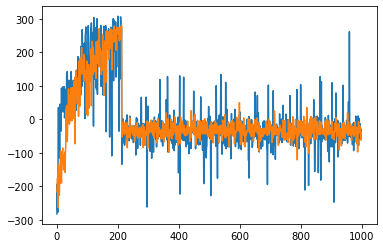

In [2]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  ReLU#,TanH
TanH=tensorflow.keras.layers.Activation('tanh')
Sigmoid=tensorflow.keras.layers.Activation('sigmoid')



class Actor(Model):
  def __init__(self,n_act):
    super(Actor, self).__init__()
    self.d1 = Dense(512, activation='relu')
    self.d2 = Dense(256, activation='relu')
    self.mean = Dense(n_act)
    self.tanh  = TanH
    self.sigmoid  = Sigmoid
    self.std = Dense(n_act)

  def call(self, x):
    
    x = self.d1(x)
    x = self.d2(x)
    #x = self.d3(x)
    #x = self.d4(x)
    mean = self.mean(x)
    mean = self.tanh(mean)
    std = self.std(x)
    std = self.sigmoid(std)
    return mean,std+10e-10


class Critic(Model):
  def __init__(self):
    super(Critic, self).__init__()
    self.d1 = Dense(512, activation='relu')
    self.d2 = Dense(256, activation='relu')
    #self.d3 = Dense(5, activation='relu')
    #self.d4 = Dense(6, activation='relu')
    self.value = Dense(1)
    

  def call(self, x):
    
    x = self.d1(x)
    x = self.d2(x)
    #x = self.d3(x)
    #x = self.d4(x)
    value = self.value(x)
    return value

class ppo_model():
    def __init__(self):
        self._actor=Actor(n_act)
        self._critic=Critic()
        self._debug = False
        self._actor_opt= Adam(0.001)
        self._critic_opt= Adam(0.001)
        self.value_coef=0.5
        self.entropy_coef=0.01
        self._gamma=0.99
        self._lambda=0.95
        self.clip_epsilon=0.05
        self._advantage=10
        
    def get_advantages(self,values, masks, rewards):
        target_qvals = []
        for i in range(len(rewards)-self._advantage):
            _values=values[i:i+self._advantage+1]
            _rewards=rewards[i:i+self._advantage]
            _masks=masks[i:i+self._advantage]
            gae = 0
            for j in reversed(range(self._advantage)):
                delta = _rewards[j] + self._gamma * _values[j + 1] * _masks[j] - _values[j]
                gae = delta + self._gamma * self._lambda * _masks[j] * gae
            target_qvals.append(gae + _values[0])
        target_qvals = np.array(target_qvals)
        adv = np.array(target_qvals) - values[:-self._advantage-1]
        return target_qvals, (adv - np.mean(adv)) / (np.std(adv) + 1e-10)
    
    def _get_advantages(self,values, masks, rewards):
        target_qvals = []
        gae=0
        for i in reversed(range(len(rewards))):
                delta = rewards[j] + self.gamma * values[j + 1] * masks[j] - values[j]
                gae = delta + self._gamma * self._lambda * masks[j] * gae
        target_qvals.append(gae + _values[0])
        target_qvals = np.array(target_qvals)
        adv = np.array(target_qvals) - values[:-self._advantage-1]
        return target_qvals, (adv - np.mean(adv)) / (np.std(adv) + 1e-10)

    def actor_loss(self,mean,std,old_mean,old_std,old_action,advantage_raw):#, rewards, values):
            old_probs = self.get_log_probs(old_action,old_mean,old_std)
            new_probs = self.get_log_probs(old_action,mean,std)
            entropy_loss = self.get_entropy(std)
            ratio = K.exp(new_probs-old_probs)
            p1 = ratio * advantage_raw
            p2 = K.clip(ratio, min_value=1 - self.clip_epsilon, max_value=1 + self.clip_epsilon) * advantage_raw
            actor_loss = K.mean(K.minimum(p1, p2))
            total_loss =   -actor_loss - self.entropy_coef * entropy_loss 
            #tf.print('A',tf.reduce_sum(new_probs),tf.reduce_sum(old_probs),'B',tf.reduce_sum(ratio))
            return total_loss

    @tf.function
    def train_actor(self,curr_states,_old_mean,_old_std,_old_actions,_advantage_raw):
             _advantage_raw=tf.cast(_advantage_raw,tf.float32)
             with tf.GradientTape() as tape:
                  mean,std = self._actor(curr_states, training=True)
                  if self._debug ==True :tf.print('1 : train_actor :',tf.reduce_sum(curr_states),tf.reduce_sum(mean),tf.reduce_sum(std))
                  _act_loss = self.actor_loss(mean,std,_old_mean,_old_std,_old_actions,_advantage_raw)
                  gradients = tape.gradient(_act_loss, self._actor.trainable_variables)
                  self._actor_opt.apply_gradients(zip(gradients, self._actor.trainable_variables))
                  #tf.print('actor grad : ',gradients[0])
             return  _act_loss

    @tf.function          
    def critic_loss(self,_values,_target_rewards):
            batch_size=_values.shape[0]
            critic_loss=self.value_coef*2*tf.reduce_sum(tf.square(_target_rewards-_values))/batch_size
            return critic_loss
        
    @tf.function
    def train_critic(self,_states,_target_rewards):
            with tf.GradientTape() as tape:
                _values=self._critic(_states)
                _values=tf.cast(_values,tf.float32)
                _target_rewards=tf.cast(_target_rewards,tf.float32)
                _critic_loss=self.critic_loss(_values,_target_rewards)
                gradients = tape.gradient(_critic_loss, self._critic.trainable_variables)
                self._critic_opt.apply_gradients(zip(gradients, self._critic.trainable_variables))
                #tf.print('critic grad : ',gradients[0])
            return _critic_loss
    @tf.function
    def get_log_probs(self,_actions,mean,std):
        _actions=tf.cast(_actions,tf.float32)
        mean=tf.cast(mean,tf.float32)
        std=tf.cast(std,tf.float32)
        _var = -0.5*((_actions-mean)/(std))**2
        _coef = 1/(std*tf.sqrt(2*np.pi)) 
        
        _probs = _coef*tf.cast(tf.exp(_var),tf.float32)
        #_probs = tf.abs(_probs+ )
        log_probs = tf.math.log(_probs)
        #if _debug==True:
        #    tf.print('2 : log_prob : _var  ',tf.reduce_sum(_var),tf.reduce_sum(_coef),tf.reduce_sum(_actions))
        #    tf.print('2 : log_prob : _probs',tf.reduce_sum(_probs),tf.reduce_sum(log_probs))
        return log_probs
    def get_entropy(self,std):
        entropy = 0.5 * (tf.math.log(2 * np.pi * std ** 2) + 1)
        return entropy




def test_reward():
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        state_input = K.expand_dims(state, 0)
        mean,std = _model._actor(state_input)
        act=np.random.normal(mean,std)[0]
        next_state, reward, done, _ = env.step(mean[0])
        if reward == -100:
            reward=-2
        state = next_state
        total_reward += reward
        
    return total_reward
    
image_based = False

env=gym.make('LunarLanderContinuous-v2')
env.seed(seed)
state = env.reset()
n_state = env.observation_space.shape[0]
n_act = env.action_space.shape[0]

_model=ppo_model()
ppo_steps = 2000
train_epochs = 5
batch_size = 200
target_reached = False
best_reward = 0
iters = 0
episodes = 1000
adv=_model._advantage
rewards_log=[]
max_reward=0
for episode in range(episodes):

    curr_states = []
    old_actions = []
    old_probs =[]
    values = []
    masks = []
    rewards = []
    old_means = []
    old_stds  = []
    state_input = None
    sum_reward=0
    sum_reward_log=0
    for itr in trange(ppo_steps+adv):
        state_input = K.expand_dims(state, 0)
        mean,std = _model._actor(state_input)
        q_value  = _model._critic(state_input)
        action = np.random.normal(mean,std)[0]
        #prob=get_log_probs(action,mean,std)
        observation, reward, done, info = env.step(action)
        if reward == -100:
            reward=-2
        #print('itration: ' + str(itr) + ', action=' + str(action) + ', reward=' + str(reward) + ', q val=' + str(q_value.numpy()))
        mask = not done

        curr_states.append(state)
        old_actions.append(action)
        #old_probs.append(prob)
        old_means.append(mean)
        old_stds.append(std)
        values.append(q_value)
        masks.append(mask)
        rewards.append(reward)
        sum_reward+=reward

        state = observation
        if done:
            sum_reward_log=copy(sum_reward)
            sum_reward=0
            env.reset()
        
    state_input=K.expand_dims(state, 0)
    q_value = _model._critic(state_input)
    values.append(q_value)
    _curr_states=np.array(curr_states).reshape(-1,n_state)
    _old_actions=np.array(old_actions).reshape(-1,n_act)
    _old_means=np.array(old_means).reshape(-1,n_act)
    _old_stds=np.array(old_stds).reshape(-1,n_act)
    _values=np.array(values).reshape(-1,1)
    _rewards=np.array(rewards).reshape(-1,1)
    _masks  = np.array(masks).reshape(-1,1)
    
    _target_qvals, _advantages = _model.get_advantages(_values, _masks, _rewards)
    for _ in range(train_epochs):
        no_of_batch=(ppo_steps//batch_size)
        index=np.arange(ppo_steps)
        np.random.shuffle(index)
        for batch in range(no_of_batch):
            _ind=index[batch*batch_size:(batch+1)*batch_size]
            _model.train_actor(_curr_states[_ind],_old_means[_ind],_old_stds[_ind],_old_actions[_ind],_advantages[_ind])
            _model.train_critic(_curr_states[_ind],_target_qvals[_ind])                            

    avg_reward = np.mean([test_reward() for _ in range(5)])
    print('episode :',episode,'reward :',sum_reward_log)   
    print('total test reward=' + str(avg_reward))
    if avg_reward >=max_reward:
        _model._actor.save_weights('ppo_best_actor_lunar.hdf5')
        _model._critic.save_weights('ppo_best_critic_lunar'+'.hdf5')
        best_eps=episode
        max_reward = avg_reward
    rewards_log.append([sum_reward_log,avg_reward])
    iters += 1
    env.reset()

env.close()
plt.plot(rewards_log)

In [3]:
_target_qvals.shape

(2000, 1)

In [4]:
env.action_space.sample()

array([-0.34142235,  0.21836315], dtype=float32)

In [5]:
#_model._actor.save_weights('ppo-1000.hdf5')
import pickle
f=open('ppo-lunar-loss.pkl','wb')
pickle.dump(rewards_log,f)
f.close()

In [6]:
#_model._actor.load_weights('ppo-1000.hdf5')

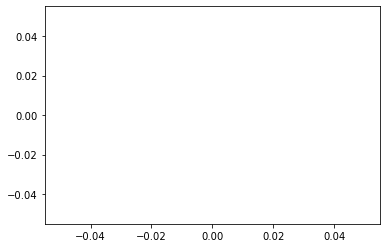

In [7]:
plt.plot(old_actions)

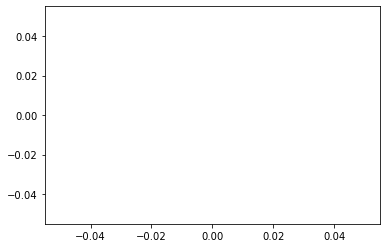

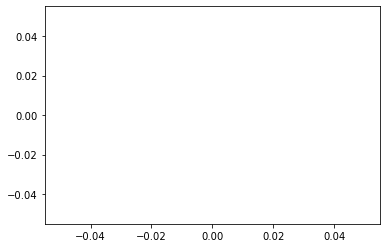

In [8]:
plt.plot(_old_means)
plt.show()
plt.plot(_old_stds)

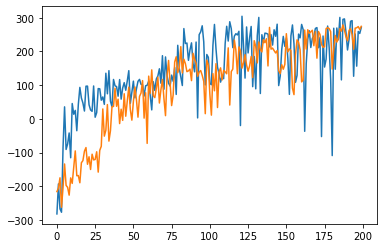

In [13]:
plt.plot(rewards_log[:200])
plt.savefig('lunar-ppo.png')

In [10]:
import os
os.mkdir('lunar_ppo')

In [11]:
seed=1
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['PYTHONHASHSEED']=str(seed)
import numpy as np
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense ,Input,concatenate ,Conv2D,Conv2DTranspose,\
MaxPooling2D,AveragePooling2D, LSTM ,Reshape, TimeDistributed,ReLU, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import warnings
import glob
import math
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import pickle
from collections import deque
from tqdm import tqdm,trange
import gym
from copy import copy , deepcopy
tf.test.is_gpu_available()


TanH=tensorflow.keras.layers.Activation('tanh')
Sigmoid=tensorflow.keras.layers.Activation('sigmoid')

class Actor(Model):
  def __init__(self,n_act):
    super(Actor, self).__init__()
    self.d1 = Dense(512, activation='relu')
    self.d2 = Dense(256, activation='relu')
    self.mean = Dense(n_act)
    self.tanh  = TanH
    self.sigmoid  = Sigmoid
    self.std = Dense(n_act)

  def call(self, x):
    
    x = self.d1(x)
    x = self.d2(x)
    #x = self.d3(x)
    #x = self.d4(x)
    mean = self.mean(x)
    mean = self.tanh(mean)
    std = self.std(x)
    std = self.sigmoid(std)
    return mean,std+10e-10

def test_reward():
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        state_input = K.expand_dims(state, 0)
        mean,std = _model._actor(state_input)
        act=np.random.normal(mean,std)[0]
        next_state, reward, done, _ = env.step(mean[0])
        if reward == -100:
            reward=-2
        state = next_state
        total_reward += reward
        
    return total_reward

env = gym.make('LunarLanderContinuous-v2')
env.seed(seed)
n_act=env.action_space.shape[0]
n_state=env.observation_space.shape[0]
_actor=Actor(n_act)
_actor(np.ones((1,n_state)))
_actor.load_weights('ppo_best_actor_lunar.hdf5')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [14]:
state=env.reset()
i=0
ter_count=0
while True:
    action=_actor(state.reshape(1,n_state))
    state,rwd,ter,info=env.step(action[0][0])
    img=env.render('rgb_array')
    cv2.imwrite('lunar_ppo/'+str(i)+'.jpg',img)
    i+=1
    if ter==True:
            ter_count+=1
            state=env.reset()
    if ter_count==5:
             break

In [15]:
env.close()